In [2]:
import numpy as np 
import pandas as pd 
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Final Project for Introduction to Deep Learning at the University of Colorado Boulder
# Classification of Mushrooms as Edible or Poisonous
## Below is the GitHub address for the repository that contains the work for this project:
## https://github.com/seaocelot/Deep_Learning_Final_Project_Colorado_Boulder.git

# Project Topic and Description of Problem:

## The Audobon Society created a data set containing the various physical characteristics and habitat attributes of mushrooms. Each type of mushroom is classified as either edible or poisonous. The poisonous category also includes mushrooms whose edibility was considered uncertain. Each instance of a mushroom is hypothetical. The objective of this machine learning problem is to create a neural network model that can properly classify a given mushroom as being either edible or poisonous. Different neural network architectures will be tried and different hyperparameters tuned to try to optimize the neural network model.

# Data:

## Information about the data set is housed at the University of California Irvine Machine Learning Repository at the web address: https://archive.ics.uci.edu/dataset/73/mushroom.

## The University of California Irvine Machine Learning Repository web site is open to the general public for anybody to download datasets from.

## Citation: "Mushroom." UCI Machine Learning Repository, 1981, https://archive.ics.uci.edu/dataset/73/mushroom.

## The name of the data set is "Mushroom".

## A copy of the data set is stored in the UC Irvine Machine Learning Repository in the form of a Python Dotdict data structure. A Python script is used to retrieve the data set. The features or predictor variables of the data set are accessed using dot commands and are stored in a pandas dataframe. The target or response variable of the data set is accessed in the same manner and is stored in a pandas dataframe as well.

In [3]:
# retrieve data set 
# dataset is in the form of a python Dotdict data structure
mushrooms_data = fetch_ucirepo(id=73) 
  
# retrieve set of predictor variables
# predictor variables are in the form of a pandas dataframe
mushrooms_predictors_df = mushrooms_data.data.features.copy()

# retrieve response variable
mushrooms_response_df = mushrooms_data.data.targets.copy()

## In order to produce a csv file of the mushrooms data set to upload to the GitHub repository, the two pandas dataframes above containing the predictor variables and response variable are combined into a single pandas dataframe and converted to a csv file. 

In [4]:
# combine predictor variables and response variable dataframes 
mushrooms_predictors_response_df = pd.concat([mushrooms_predictors_df, mushrooms_response_df], axis=1)

# converted combined dataframe to csv file
mushrooms_predictors_response_df.to_csv('mushrooms_data.csv')

## The size of the mushrooms data csv file above is 411,039 bytes.

## Display head of pandas dataframe that contains predictor variables of the mushrooms data.

In [4]:
# display head of pandas dataframe of predictor variables of the mushrooms data 
pd.set_option('display.max_columns', None)
mushrooms_predictors_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## Below are the keys for the descriptive code letters of the 22 predictor variables in the mushrooms data. The format used here is very similar to the format used in the University of California Irvine Machine Learning Repository web site that houses and describes the mushrooms data set.

## cap-shape: bell = b, conical = c, convex = x, flat = f, knobbed = k, sunken = s
## cap-surface: fibrous = f, grooves = g, scaly = y, smooth = s
## cap-color: brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u,red = e,white = w, yellow = y
## bruises: bruises = t,no = f
## odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p,spicy = s
## gill-attachment: attached = a, descending = d, free = f, notched = n
## gill-spacing: close = c, crowded = w, distant = d
## gill-size: broad = b, narrow = n
## gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w, yellow = y
## stalk-shape: enlarging = e, tapering = t
## stalk-root: bulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
## stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s
## stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s
## stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
## stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
## veil-type: partial = p, universal = u
## veil-color: brown = n, orange = o, white = w, yellow = y
## ring-number: none = n, one = o, two = t
## ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z
## spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o, purple = u, white = w, yellow = y
## population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
## habitat: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d

## Display basic information about pandas dataframe that contains predictor variables of mushrooms data.

In [4]:
# display basic information about pandas dataframe of predictor variables of mushrooms data
mushrooms_predictors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

## There are a total of 8,124 mushroom entries in the data set. There are a total of 22 columns that contain the predictor variables for the mushrooms in the data set.

## The predictor variables from "cap-shape" through "spore-print-color" represent some type of observed trait or physical appearance of the mushroom.

## The predictor variable "population" refers to the overall number of neighboring mushrooms of the same type.

## The predictor variable "habitat" refers to the type of environment the mushroom was found growing in.

## Display head of pandas dataframe that contains the response variable of mushrooms data.

In [5]:
# display head of pandas dataframe of response variable of mushroom data 
mushrooms_response_df.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


## Below is the key for the descriptive code letter of the response variable in the mushrooms data.

## poisonous: edible = e, poisonous = p

## Display basic information about pandas dataframe that contains response variable of the mushrooms data.

In [6]:
# display basic information about pandas dataframe of response variable of the mushrooms data 
mushrooms_response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   poisonous  8124 non-null   object
dtypes: object(1)
memory usage: 63.6+ KB


# Data Cleaning:

# Below is data cleaning in which Na, NaN, and None values are being searched for in the predictor variables. The "stalk-root" column shows 2,480 entries are missing data.

In [7]:
# print number of Na, NaN, or None values for all columns

for column_name in mushrooms_predictors_df.columns[0:22]:
    print("The number of Na, NaN, or None values in the " + column_name + " column is: " + str(sum(mushrooms_predictors_df[column_name].isna())))

The number of Na, NaN, or None values in the cap-shape column is: 0
The number of Na, NaN, or None values in the cap-surface column is: 0
The number of Na, NaN, or None values in the cap-color column is: 0
The number of Na, NaN, or None values in the bruises column is: 0
The number of Na, NaN, or None values in the odor column is: 0
The number of Na, NaN, or None values in the gill-attachment column is: 0
The number of Na, NaN, or None values in the gill-spacing column is: 0
The number of Na, NaN, or None values in the gill-size column is: 0
The number of Na, NaN, or None values in the gill-color column is: 0
The number of Na, NaN, or None values in the stalk-shape column is: 0
The number of Na, NaN, or None values in the stalk-root column is: 2480
The number of Na, NaN, or None values in the stalk-surface-above-ring column is: 0
The number of Na, NaN, or None values in the stalk-surface-below-ring column is: 0
The number of Na, NaN, or None values in the stalk-color-above-ring column 

# Below is data cleaning in which "?" value is searched for in the predictor variables. No such values were found.

In [8]:
# print number of ? values in all columns

for column_name in mushrooms_predictors_df.columns[0:22]:
    print("The number of ? values in the " + column_name + " column is: " + str(sum(mushrooms_predictors_df[column_name] == '?')))

The number of ? values in the cap-shape column is: 0
The number of ? values in the cap-surface column is: 0
The number of ? values in the cap-color column is: 0
The number of ? values in the bruises column is: 0
The number of ? values in the odor column is: 0
The number of ? values in the gill-attachment column is: 0
The number of ? values in the gill-spacing column is: 0
The number of ? values in the gill-size column is: 0
The number of ? values in the gill-color column is: 0
The number of ? values in the stalk-shape column is: 0
The number of ? values in the stalk-root column is: 0
The number of ? values in the stalk-surface-above-ring column is: 0
The number of ? values in the stalk-surface-below-ring column is: 0
The number of ? values in the stalk-color-above-ring column is: 0
The number of ? values in the stalk-color-below-ring column is: 0
The number of ? values in the veil-type column is: 0
The number of ? values in the veil-color column is: 0
The number of ? values in the ring

# Since the number of missing entries in the "stalk-root" column is very high at 2,480 values, I decided to remove the entire column from the predictor variables dataframe.

In [4]:
# Remove "stalk-root" column from mushrooms_predictors_df 
mushrooms_predictors_df.drop("stalk-root", axis = 1, inplace = True)

# Below is data cleaning in which Na, NaN, and None values are being searched for in the response variable. No such values were found.

In [10]:
# print number of Na, NaN, or None values for column

for column_name in mushrooms_response_df.columns[0:22]:
    print("The number of Na, NaN, or None values in the " + column_name + " column is: " + str(sum(mushrooms_response_df[column_name].isna())))

The number of Na, NaN, or None values in the poisonous column is: 0


# Below is data cleaning in which "?" value is searched for in the response variable. No such values were found.

In [11]:
# print number of ? values in column

for column_name in mushrooms_response_df.columns[0:1]:
    print("The number of ? values in the " + column_name + " column is: " + str(sum(mushrooms_response_df[column_name] == '?')))

The number of ? values in the poisonous column is: 0


# Exploratory Data Analysis:

## Below is a histogram showing the ratio of the number of poisonous and edible mushrooms.

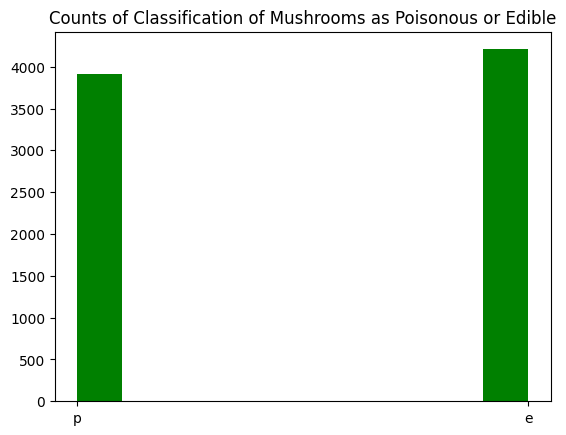

In [12]:
plt.hist(mushrooms_response_df['poisonous'], color = 'green')

plt.title('Counts of Classification of Mushrooms as Poisonous or Edible')

plt.show()

## When looking at the histogram above, the response variable in the mushrooms data is well balanced and whatever small imbalance exists is unlikely to have a significant impact on the performance of the neural network model.

## Below are histograms for each of the predictor variables:

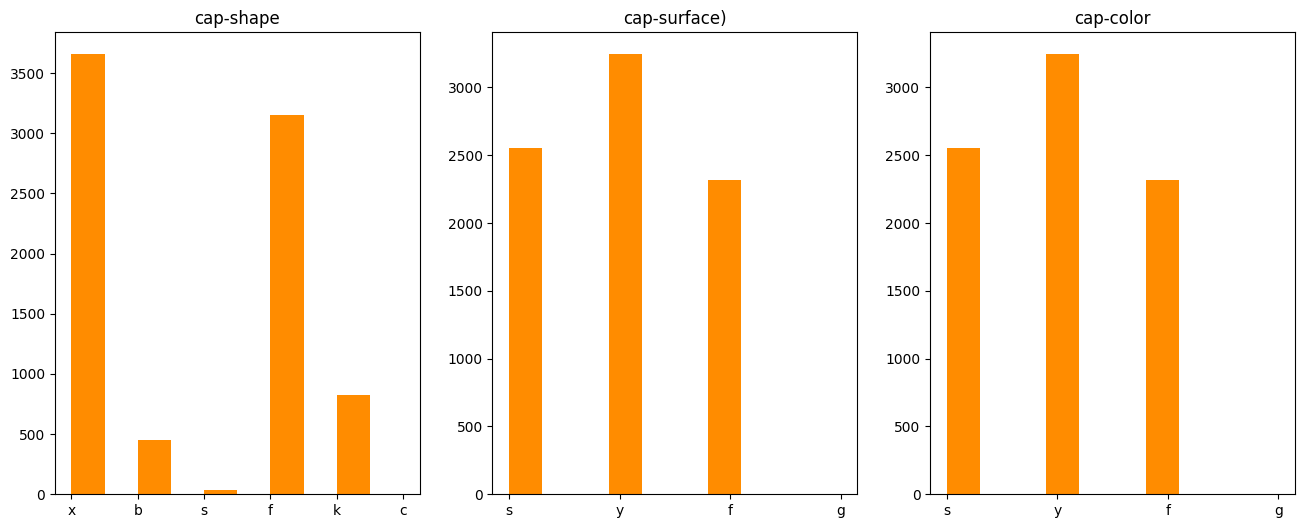

In [23]:
# create histograms for cap-shape, cap-surface, and cap-color

whole, (plot_1, plot_2, plot_3) = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

plot_1.hist(mushrooms_predictors_df['cap-shape'], color = 'darkorange')
plot_1.set_title('cap-shape')

plot_2.hist(mushrooms_predictors_df['cap-surface'], color = 'darkorange')
plot_2.set_title('cap-surface)')

plot_3.hist(mushrooms_predictors_df['cap-surface'], color = 'darkorange')
plot_3.set_title('cap-color')

plt.show()

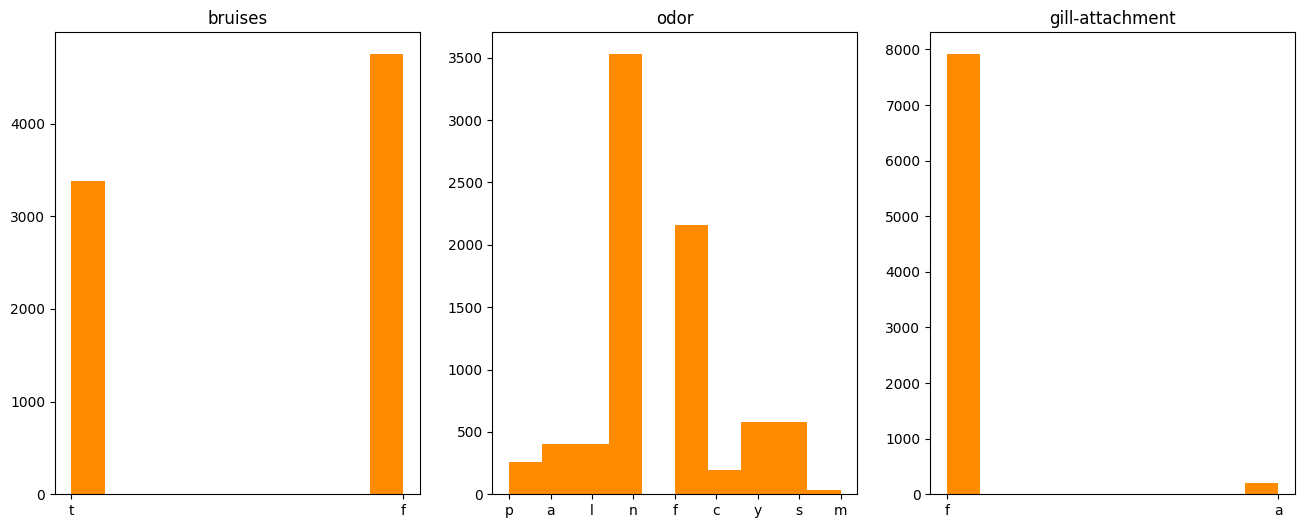

In [26]:
# create histograms for bruises, odor, and gill-attachment

whole, (plot_1, plot_2, plot_3) = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

plot_1.hist(mushrooms_predictors_df['bruises'], color = 'darkorange')
plot_1.set_title('bruises')

plot_2.hist(mushrooms_predictors_df['odor'], color = 'darkorange')
plot_2.set_title('odor')

plot_3.hist(mushrooms_predictors_df['gill-attachment'], color = 'darkorange')
plot_3.set_title('gill-attachment')

plt.show()

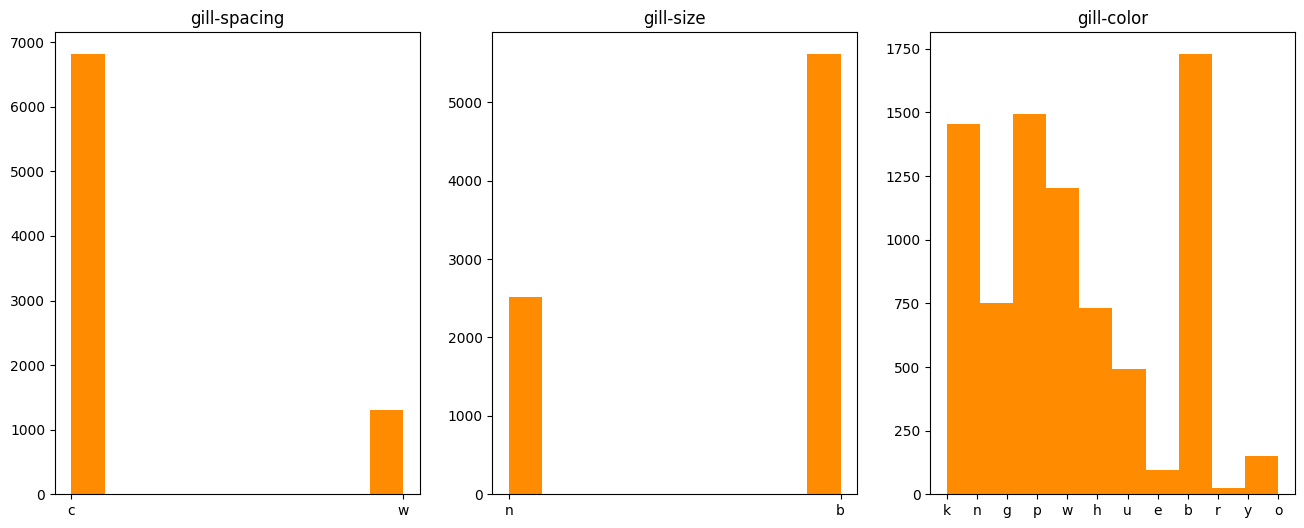

In [27]:
# create histograms for gill-spacing, gill-size, and gill-color

whole, (plot_1, plot_2, plot_3) = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

plot_1.hist(mushrooms_predictors_df['gill-spacing'], color = 'darkorange')
plot_1.set_title('gill-spacing')

plot_2.hist(mushrooms_predictors_df['gill-size'], color = 'darkorange')
plot_2.set_title('gill-size')

plot_3.hist(mushrooms_predictors_df['gill-color'], color = 'darkorange')
plot_3.set_title('gill-color')

plt.show()

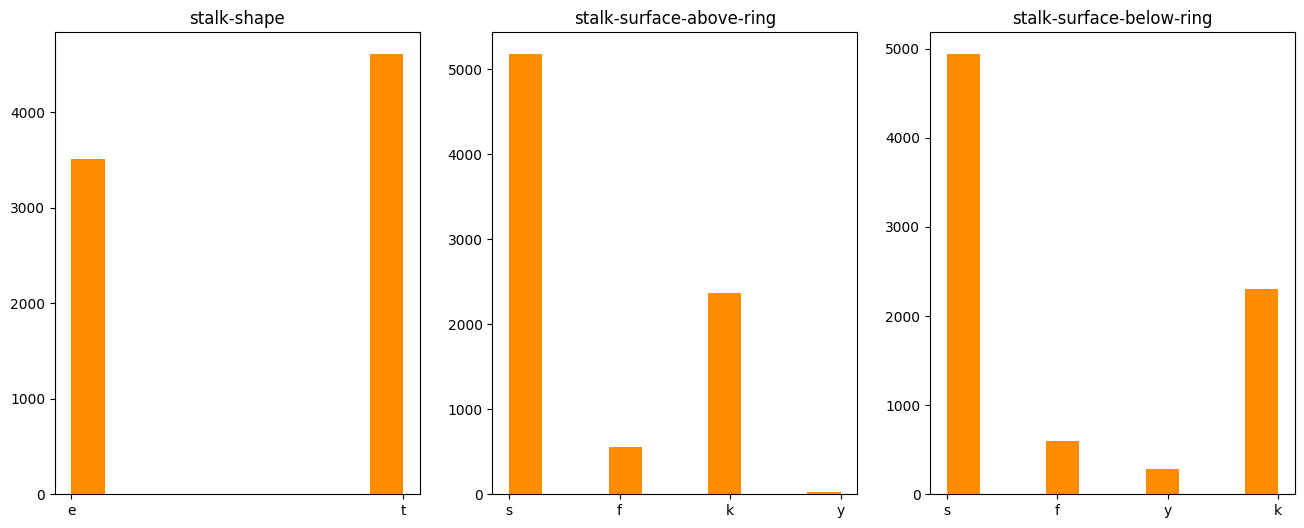

In [29]:
# create histograms for stalk-shape, stalk-surface-above-ring, and stalk-surface-below-ring

whole, (plot_1, plot_2, plot_3) = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

plot_1.hist(mushrooms_predictors_df['stalk-shape'], color = 'darkorange')
plot_1.set_title('stalk-shape')

plot_2.hist(mushrooms_predictors_df['stalk-surface-above-ring'], color = 'darkorange')
plot_2.set_title('stalk-surface-above-ring')

plot_3.hist(mushrooms_predictors_df['stalk-surface-below-ring'], color = 'darkorange')
plot_3.set_title('stalk-surface-below-ring')

plt.show()

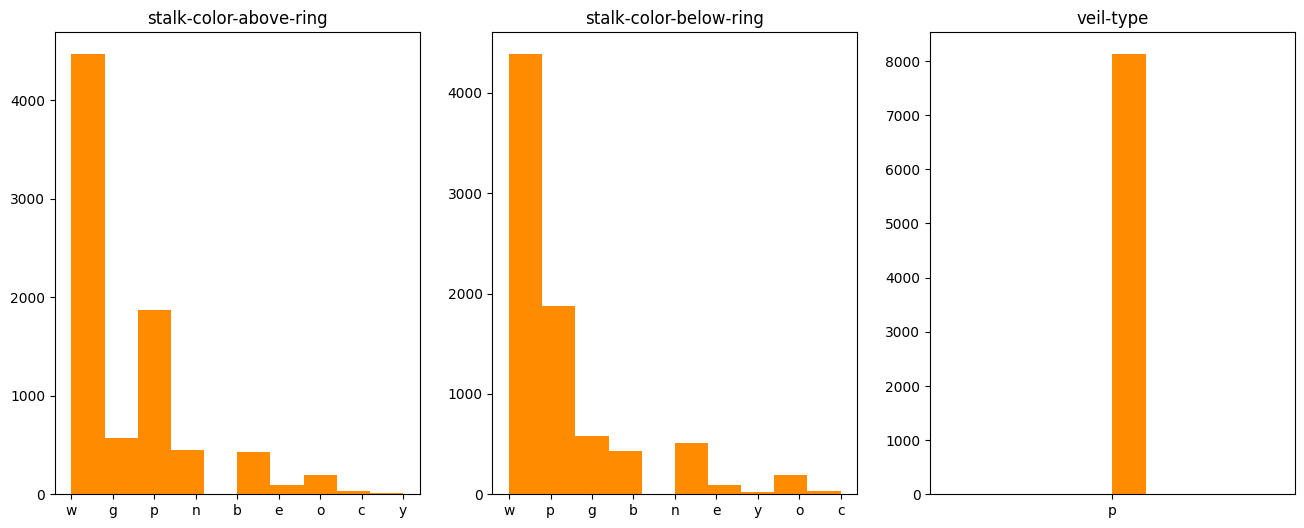

In [31]:
# create histograms for stalk-color-above-ring, stalk-color-below-ring, and veil-type

whole, (plot_1, plot_2, plot_3) = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

plot_1.hist(mushrooms_predictors_df['stalk-color-above-ring'], color = 'darkorange')
plot_1.set_title('stalk-color-above-ring')

plot_2.hist(mushrooms_predictors_df['stalk-color-below-ring'], color = 'darkorange')
plot_2.set_title('stalk-color-below-ring')

plot_3.hist(mushrooms_predictors_df['veil-type'], color = 'darkorange')
plot_3.set_title('veil-type')

plt.show()

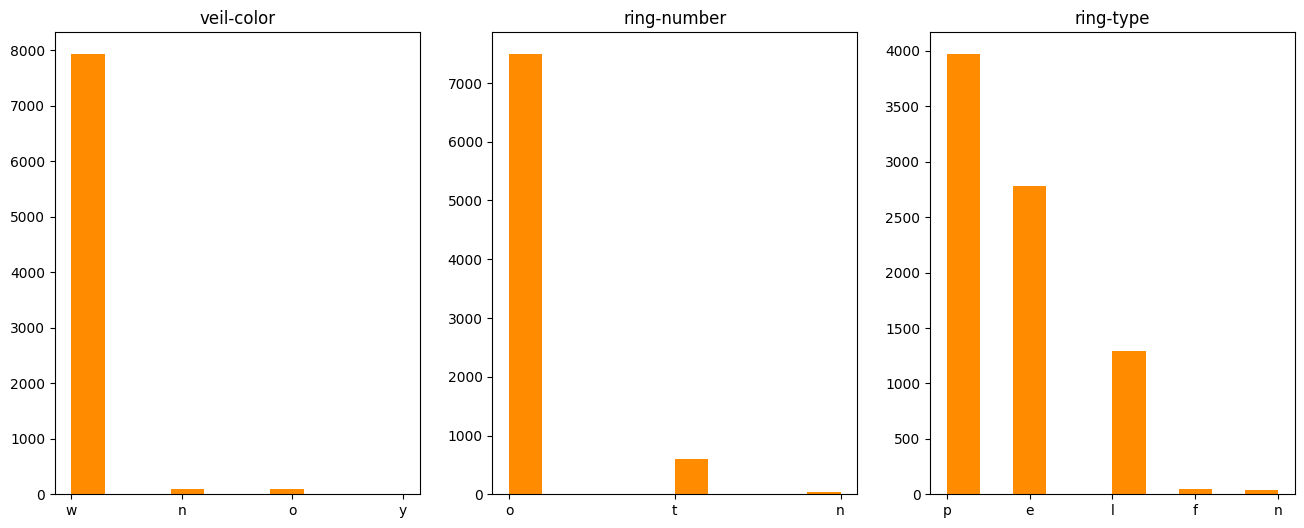

In [32]:
# create histograms for veil-color, ring-number, and ring-type

whole, (plot_1, plot_2, plot_3) = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

plot_1.hist(mushrooms_predictors_df['veil-color'], color = 'darkorange')
plot_1.set_title('veil-color')

plot_2.hist(mushrooms_predictors_df['ring-number'], color = 'darkorange')
plot_2.set_title('ring-number')

plot_3.hist(mushrooms_predictors_df['ring-type'], color = 'darkorange')
plot_3.set_title('ring-type')

plt.show()

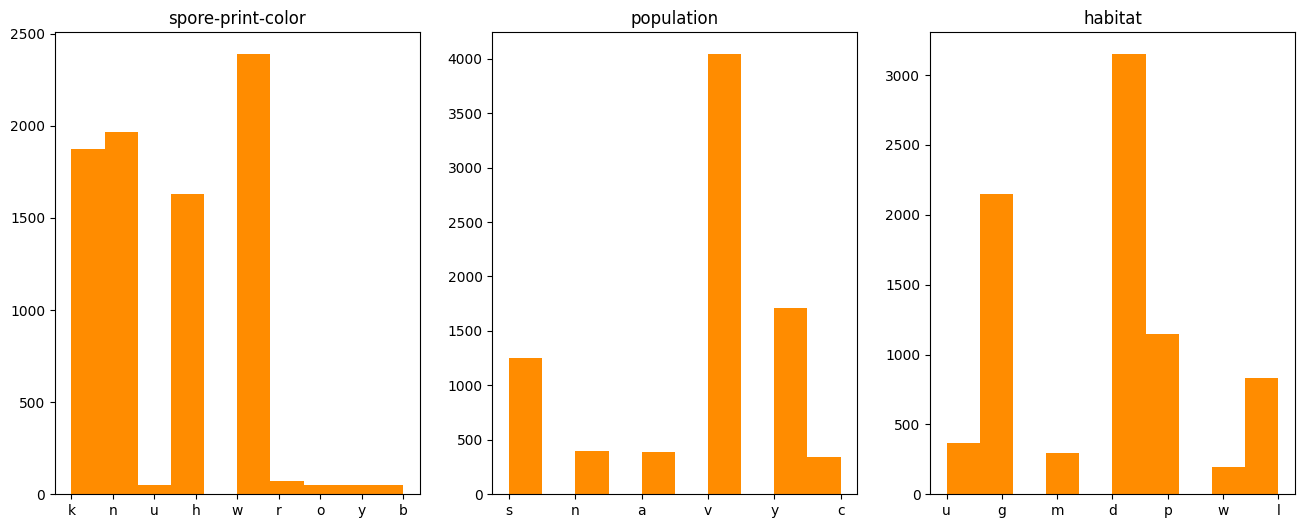

In [34]:
# create histograms for spore-print-color, population, and habitat

whole, (plot_1, plot_2, plot_3) = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

plot_1.hist(mushrooms_predictors_df['spore-print-color'], color = 'darkorange')
plot_1.set_title('spore-print-color')

plot_2.hist(mushrooms_predictors_df['population'], color = 'darkorange')
plot_2.set_title('population')

plot_3.hist(mushrooms_predictors_df['habitat'], color = 'darkorange')
plot_3.set_title('habitat')

plt.show()

## When looking at the histograms above no rogue values are seen. The data appears to be of a good form to move forward with preparing the data to be fed into neural networks.

## Before moving forward with model building, a partial heat map is generated below to look at the correlation values among a subset of the predictor variables and the response variable.

In [19]:
# take selection of predictor variables
mushrooms_predicted_selection_df = mushrooms_predictors_df[['veil-color', 'gill-attachment', 'stalk-color-above-ring', 'stalk-color-below-ring']]

# apply one hot encoding to predictor variables
mushrooms_predicted_selection_response_OHE_df = pd.get_dummies(mushrooms_predicted_selection_df, dtype = int).copy()

# apply one hot encoding to response variable 
mushrooms_response_OHE_df = pd.get_dummies(mushrooms_response_df, dtype = int).copy()

# combmine selection of predictor variables and response variable
mushrooms_selection_combined_OHE_df = pd.concat([mushrooms_predicted_selection_response_OHE_df, mushrooms_response_OHE_df], axis = 1).copy()

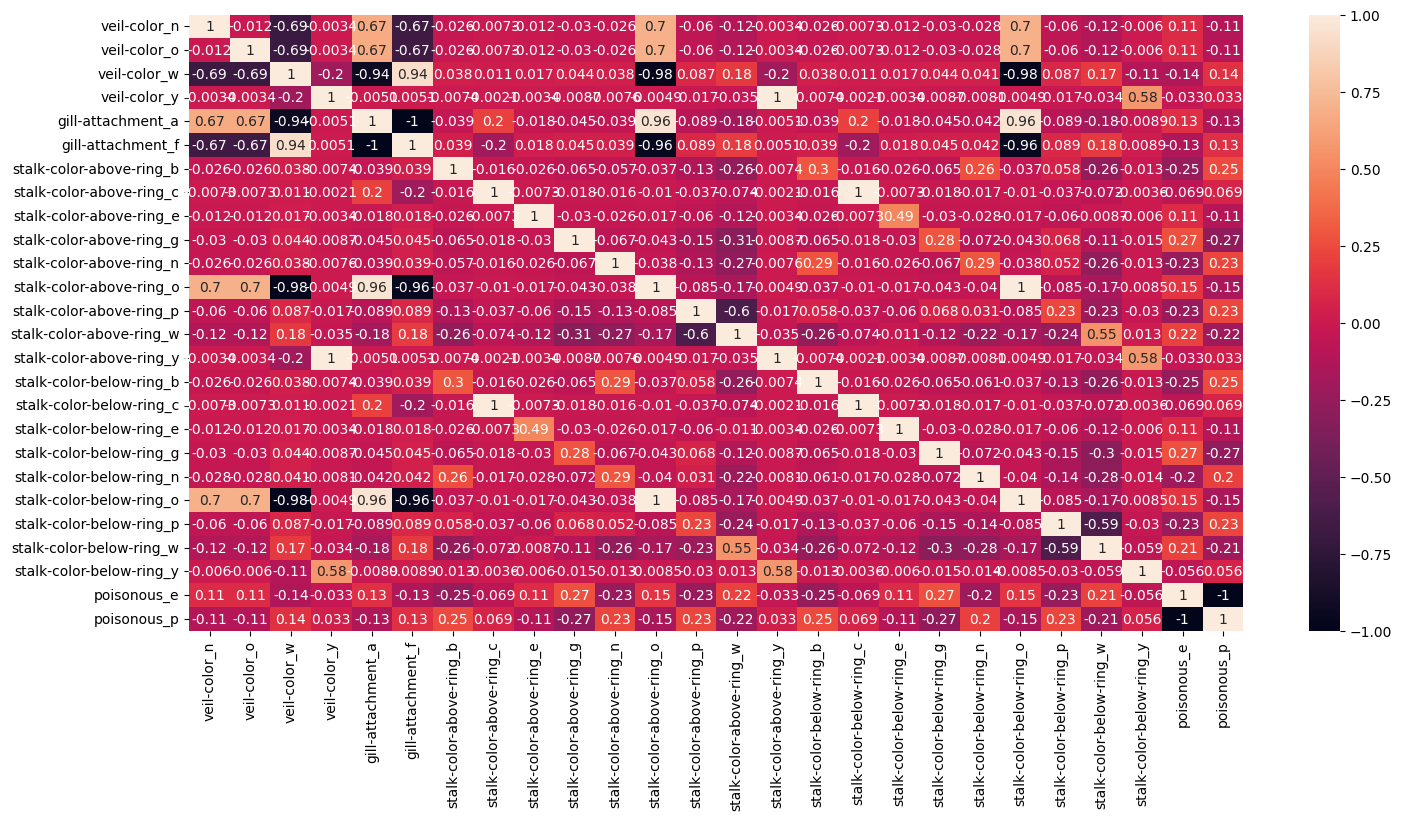

In [21]:
# generate partial heat map
heat_map_mushrooms = mushrooms_selection_combined_OHE_df.corr()

plt.figure(figsize = (17, 8))

sns.heatmap(heat_map_mushrooms, annot = True)

plt.show()

## When looking at the partial heat map above, there are some very high correlation values seen. 

## Since the heat map above is only a partial heat map, I generated two lists below of predictor variables that have a correlation value greater than 0.85 and predictor variables that have a correlation value less than -0.85.

In [5]:
# apply one hot encoding to predictor variables
mushrooms_predictors_OHE_df = pd.get_dummies(mushrooms_predictors_df, dtype = int).copy()

# apply one hot encoding to response variable
mushrooms_response_OHE_df = pd.get_dummies(mushrooms_response_df, dtype = int).copy()

In [6]:
# combine predictor variables and response variable
mushrooms_combined_OHE_df = pd.concat([mushrooms_predictors_OHE_df, mushrooms_response_OHE_df], axis = 1).copy()

In [7]:
# find correlation values of predictor variables and response variable
variables_correlation_values_df = mushrooms_combined_OHE_df.corr().copy()

In [7]:
# generate list of predictor variables with correlation values above 0.85
variables_correlation_values_selected_pos_df = variables_correlation_values_df[variables_correlation_values_df > 0.85].stack().dropna().copy()
variables_correlation_values_selected_pos_df = variables_correlation_values_selected_pos_df[variables_correlation_values_selected_pos_df != 1.000000].copy()
variables_correlation_values_selected_pos_df

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


gill-attachment_a         stalk-color-above-ring_o    0.955097
                          stalk-color-below-ring_o    0.955097
gill-attachment_f         veil-color_w                0.935238
stalk-color-above-ring_o  gill-attachment_a           0.955097
stalk-color-below-ring_o  gill-attachment_a           0.955097
veil-color_w              gill-attachment_f           0.935238
ring-type_l               spore-print-color_h         0.868930
spore-print-color_h       ring-type_l                 0.868930
dtype: float64

In [8]:
# generate list of predictor variables with correlation values below -0.85
variables_correlation_values_selected_neg_df = variables_correlation_values_df[variables_correlation_values_df < -0.85].stack().dropna().copy()
variables_correlation_values_selected_neg_df = variables_correlation_values_selected_neg_df[variables_correlation_values_selected_neg_df > -0.999999].copy()
variables_correlation_values_selected_neg_df

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


gill-attachment_a           veil-color_w                 -0.935238
gill-attachment_f           stalk-color-above-ring_o     -0.955097
                            stalk-color-below-ring_o     -0.955097
stalk-surface-above-ring_k  stalk-surface-above-ring_s   -0.850905
stalk-surface-above-ring_s  stalk-surface-above-ring_k   -0.850905
stalk-color-above-ring_o    gill-attachment_f            -0.955097
                            veil-color_w                 -0.979302
stalk-color-below-ring_o    gill-attachment_f            -0.955097
                            veil-color_w                 -0.979302
veil-color_w                gill-attachment_a            -0.935238
                            stalk-color-above-ring_o     -0.979302
                            stalk-color-below-ring_o     -0.979302
ring-number_o               ring-number_t                -0.968959
ring-number_t               ring-number_o                -0.968959
dtype: float64

## When looking at the two lists above of high correlation values, it is clear that several predictor variables show very signficant correlation with one another. When I begin to create different models, I will use the full set of data in the first 16 models. For model 17, some of the predictor variables with very high correlation values will be removed from the data set in an effort to simplify the model. The specific predictor variables that will be removed from the data set will be discussed as part of the description for model 17 later in the notebook.

# Data Preparation:
## Since all of the predictor variables and response variable are categorical, the data needs to be converted to a numerical form before it can be fed into a neural network. This process of converting the predictor variables and the response variable to numerical form using one hot encoding was already done above to find the correlation values among the predictor variables and the response variable. The predictor variables and the response variable are of binary form.

## The mushrooms data is divided into a train set (80%) and a test set (20%).

In [8]:
# create train and test sets for the data
mushrooms_predictors_train_df, mushrooms_predictors_test_df, mushrooms_response_train_df, mushrooms_response_test_df = train_test_split(mushrooms_predictors_OHE_df, mushrooms_response_OHE_df, test_size = 0.2, random_state = 525)

# Model Building and Training:

## Below is series of models that differ in their architecture and hyperparameters. For the output layers, all of the models use the sigmoid activation. For the hidden layers, all of the models use the relu activation. For all of the models, the loss function used is binary crossentropy. The ways in which all of the models differ from one another are described for each individual model.

## Model 1: This model has a single hidden layer that is a dense layer. The number of neurons in the hidden layer is 1. The optimizer is SGD. 

In [10]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(1, activation = 'relu')(layer_input)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_1)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7627 - loss: 0.6149 - val_accuracy: 0.8454 - val_loss: 0.5110
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8536 - loss: 0.5041 - val_accuracy: 0.8869 - val_loss: 0.4467
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8924 - loss: 0.4456 - val_accuracy: 0.9131 - val_loss: 0.3967
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9151 - loss: 0.3989 - val_accuracy: 0.9331 - val_loss: 0.3552
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9317 - loss: 0.3600 - val_accuracy: 0.9515 - val_loss: 0.3206
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9488 - loss: 0.3274 - val_accuracy: 0.9646 - val_loss: 0.2916
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9586 - loss: 0.3001 - val_accuracy: 0.9723 - val_loss: 0.2673
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.2768 - val_accuracy: 0.

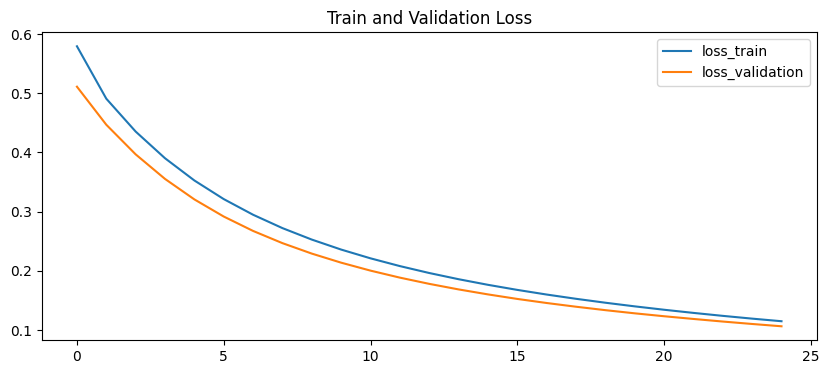

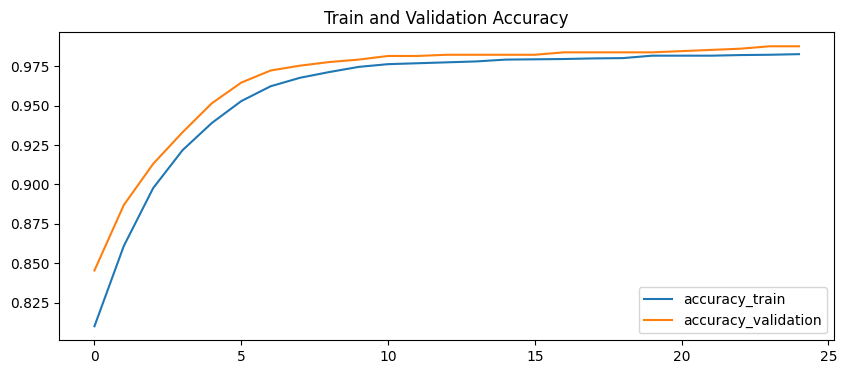

In [11]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 2: This model has a single hidden layer that is a dense layer. The number of neurons in the hidden layer is 1. The optimizer is adam. 

In [12]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(1, activation = 'relu')(layer_input)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_1)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7808 - loss: 0.5909 - val_accuracy: 0.8915 - val_loss: 0.4480
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9040 - loss: 0.4350 - val_accuracy: 0.9415 - val_loss: 0.3601
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9399 - loss: 0.3554 - val_accuracy: 0.9662 - val_loss: 0.2993
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9640 - loss: 0.2987 - val_accuracy: 0.9815 - val_loss: 0.2550
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.2562 - val_accuracy: 0.9846 - val_loss: 0.2209
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.2224 - val_accuracy: 0.9869 - val_loss: 0.1936
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.1947 - val_accuracy: 0.9908 - val_loss: 0.1710
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9877 - loss: 0.1715 - val_accuracy: 0.

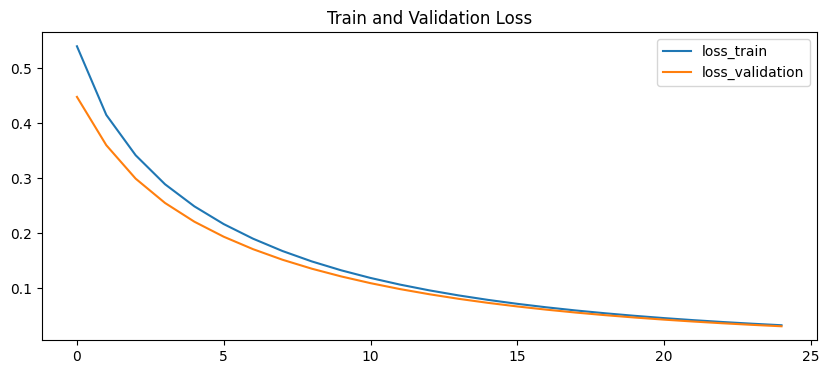

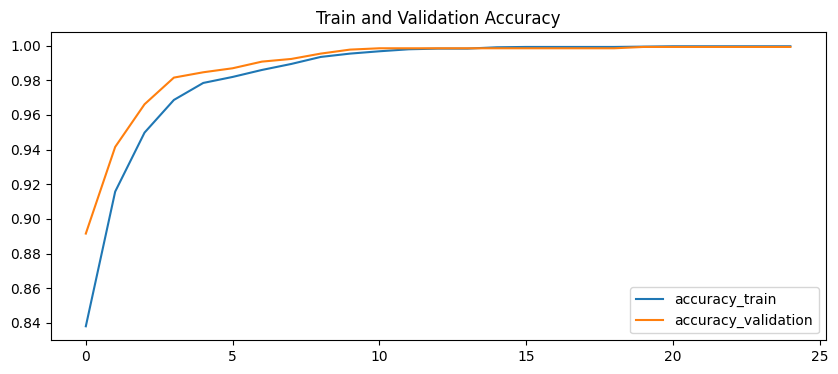

In [13]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 3: This model has a single hidden layer that is a dense layer. Kernel regularization is added to the hidden layer of l2 = 0.0001. The number of neurons in the hidden layer is 1. The optimizer is SGD.

In [14]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(1, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.0001))(layer_input)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_1)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7627 - loss: 0.6152 - val_accuracy: 0.8454 - val_loss: 0.5112
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8536 - loss: 0.5043 - val_accuracy: 0.8862 - val_loss: 0.4470
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8922 - loss: 0.4459 - val_accuracy: 0.9131 - val_loss: 0.3970
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9151 - loss: 0.3992 - val_accuracy: 0.9331 - val_loss: 0.3556
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9311 - loss: 0.3604 - val_accuracy: 0.9515 - val_loss: 0.3210
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9488 - loss: 0.3279 - val_accuracy: 0.9646 - val_loss: 0.2921
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9586 - loss: 0.3005 - val_accuracy: 0.9723 - val_loss: 0.2678
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.2773 - val_accuracy: 0.

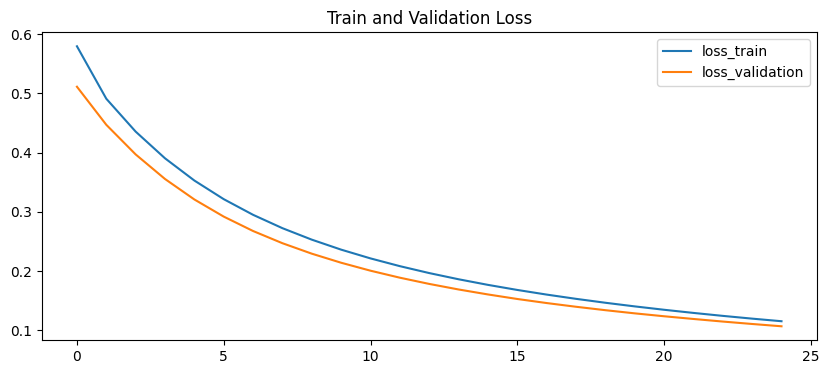

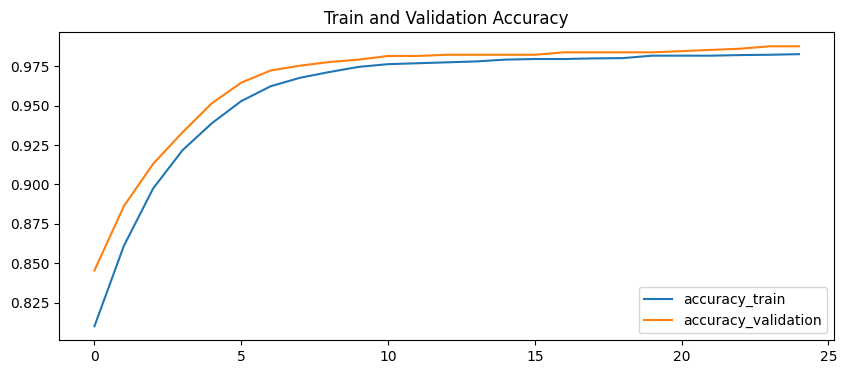

In [15]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 4: This model has a single hidden layer that is a dense layer. Kernel regularization is added to the hidden layer of l2 = 0.001. The number of neurons in the hidden layer is 1. The optimizer is SGD.

In [16]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(1, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001))(layer_input)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_1)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7625 - loss: 0.6172 - val_accuracy: 0.8454 - val_loss: 0.5136
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.5068 - val_accuracy: 0.8862 - val_loss: 0.4498
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8919 - loss: 0.4487 - val_accuracy: 0.9115 - val_loss: 0.4002
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9151 - loss: 0.4024 - val_accuracy: 0.9323 - val_loss: 0.3591
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9306 - loss: 0.3640 - val_accuracy: 0.9523 - val_loss: 0.3249
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9485 - loss: 0.3318 - val_accuracy: 0.9646 - val_loss: 0.2963
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9597 - loss: 0.3047 - val_accuracy: 0.9723 - val_loss: 0.2723
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.2816 - val_accuracy: 0.

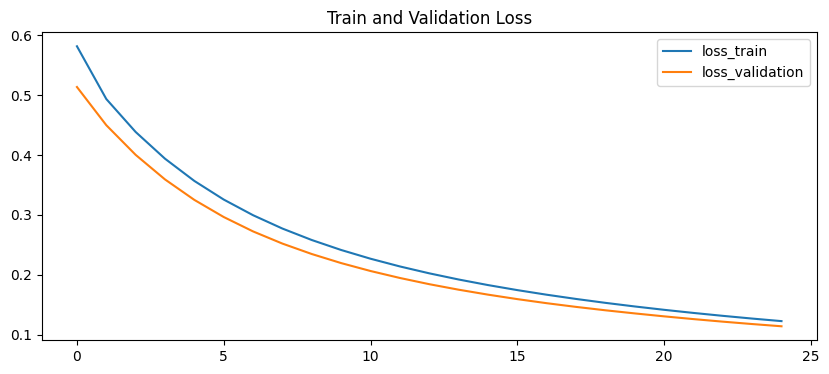

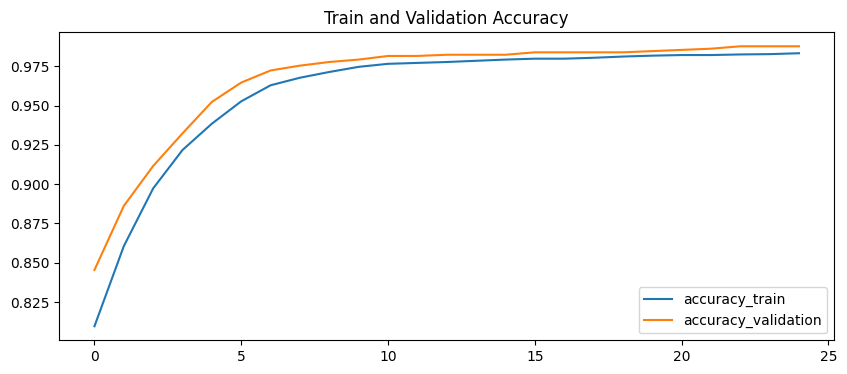

In [17]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 5: This model has a single hidden layer that is a dense layer. Kernel regularization is added to the hidden layer of l2 = 0.01. The number of neurons in the hidden layer is 1. The optimizer is SGD.

In [18]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(1, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01))(layer_input)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_1)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7630 - loss: 0.6376 - val_accuracy: 0.8462 - val_loss: 0.5358
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8520 - loss: 0.5294 - val_accuracy: 0.8869 - val_loss: 0.4748
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8883 - loss: 0.4740 - val_accuracy: 0.9062 - val_loss: 0.4279
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9135 - loss: 0.4302 - val_accuracy: 0.9308 - val_loss: 0.3894
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9303 - loss: 0.3938 - val_accuracy: 0.9492 - val_loss: 0.3573
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9463 - loss: 0.3635 - val_accuracy: 0.9631 - val_loss: 0.3304
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9576 - loss: 0.3378 - val_accuracy: 0.9715 - val_loss: 0.3077
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9666 - loss: 0.3161 - val_accuracy: 0.

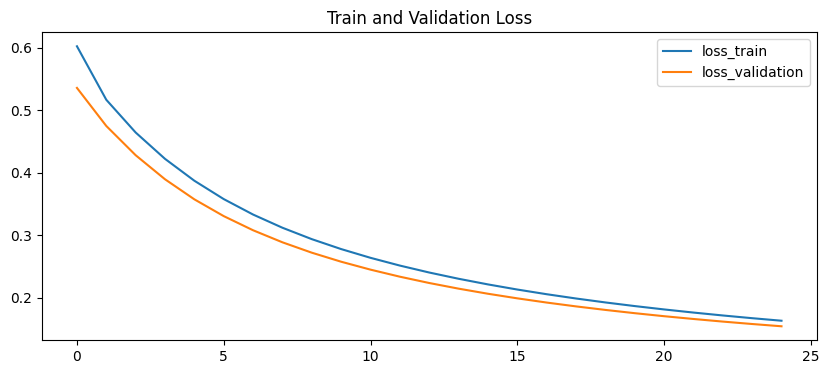

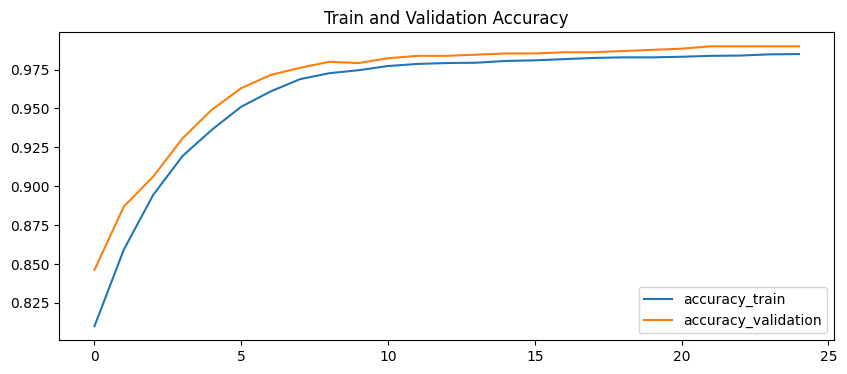

In [19]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 6: This model has a single hidden layer that is a dense layer. Kernel regularization is added to the hidden layer of l2 = 0.0001. The number of neurons in the hidden layer is 1. The optimizer is adam.

In [20]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(1, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.0001))(layer_input)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_1)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7787 - loss: 0.5915 - val_accuracy: 0.8900 - val_loss: 0.4489
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9041 - loss: 0.4357 - val_accuracy: 0.9392 - val_loss: 0.3607
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9397 - loss: 0.3560 - val_accuracy: 0.9669 - val_loss: 0.2997
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.2994 - val_accuracy: 0.9823 - val_loss: 0.2556
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9761 - loss: 0.2569 - val_accuracy: 0.9846 - val_loss: 0.2216
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.2233 - val_accuracy: 0.9877 - val_loss: 0.1945
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9835 - loss: 0.1958 - val_accuracy: 0.9908 - val_loss: 0.1720
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9876 - loss: 0.1727 - val_accuracy: 0.

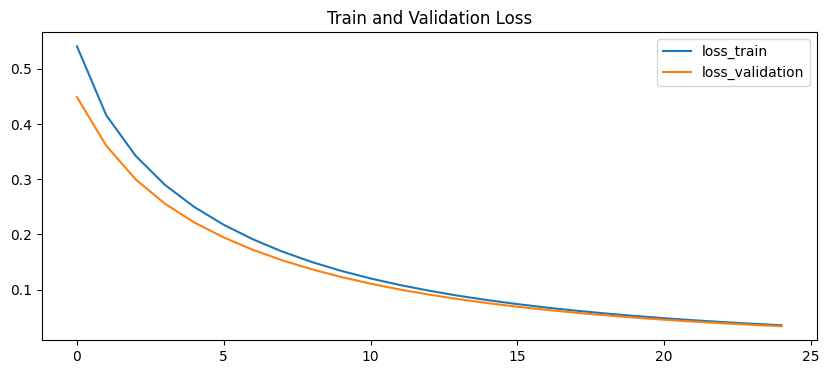

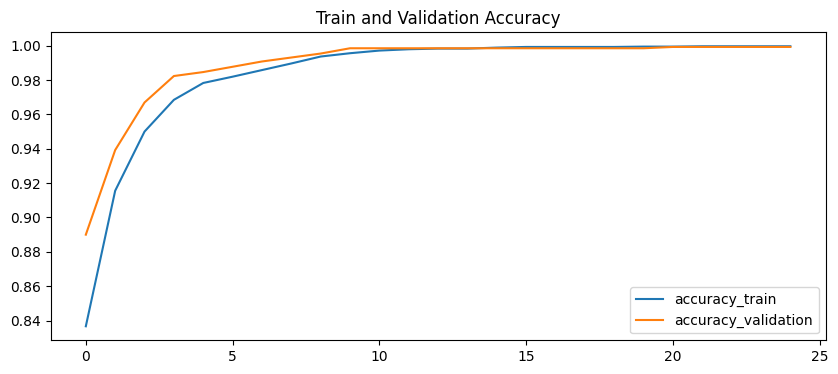

In [21]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 7: This model has a single hidden layer that is a dense layer. Kernel regularization is added to the hidden layer of l2 = 0.001. The number of neurons in the hidden layer is 1. The optimizer is adam.

In [22]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(1, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001))(layer_input)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_1)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7789 - loss: 0.5936 - val_accuracy: 0.8900 - val_loss: 0.4517
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9043 - loss: 0.4388 - val_accuracy: 0.9392 - val_loss: 0.3647
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9396 - loss: 0.3603 - val_accuracy: 0.9669 - val_loss: 0.3052
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9644 - loss: 0.3051 - val_accuracy: 0.9808 - val_loss: 0.2623
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9752 - loss: 0.2639 - val_accuracy: 0.9846 - val_loss: 0.2296
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.2316 - val_accuracy: 0.9877 - val_loss: 0.2035
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.2053 - val_accuracy: 0.9900 - val_loss: 0.1820
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9861 - loss: 0.1833 - val_accuracy: 0.

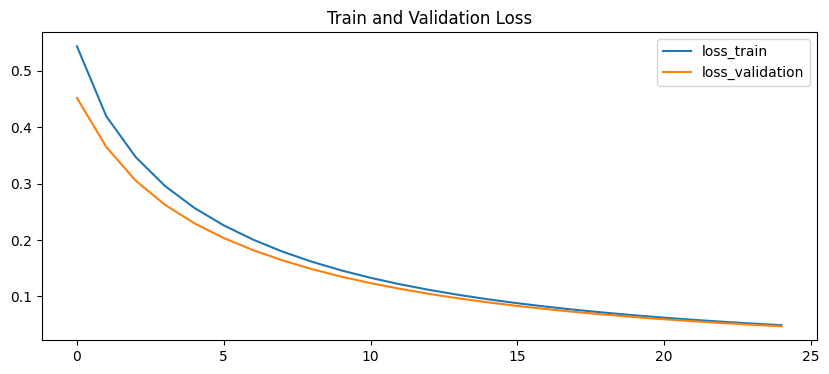

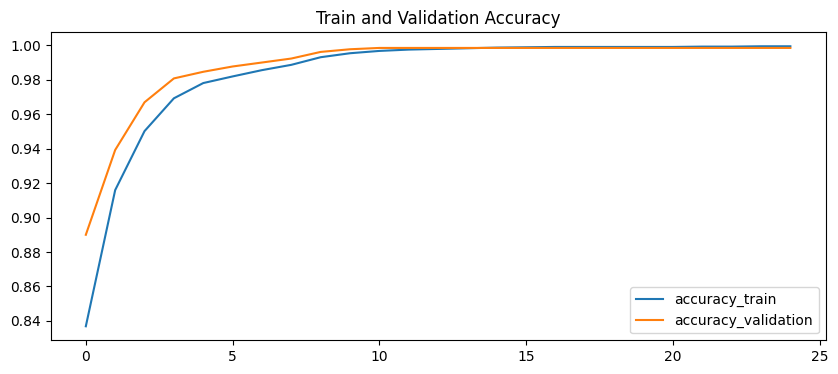

In [23]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 8: This model has a single hidden layer that is a dense layer. Kernel regularization is added to the hidden layer of l2 = 0.01. The number of neurons in the hidden layer is 1. The optimizer is adam.

In [24]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(1, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01))(layer_input)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_1)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7772 - loss: 0.6129 - val_accuracy: 0.8846 - val_loss: 0.4739
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9010 - loss: 0.4621 - val_accuracy: 0.9354 - val_loss: 0.3942
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9382 - loss: 0.3906 - val_accuracy: 0.9677 - val_loss: 0.3414
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9622 - loss: 0.3418 - val_accuracy: 0.9815 - val_loss: 0.3033
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9753 - loss: 0.3055 - val_accuracy: 0.9885 - val_loss: 0.2738
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.2767 - val_accuracy: 0.9885 - val_loss: 0.2496
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.2530 - val_accuracy: 0.9885 - val_loss: 0.2294
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9837 - loss: 0.2328 - val_accuracy: 0.

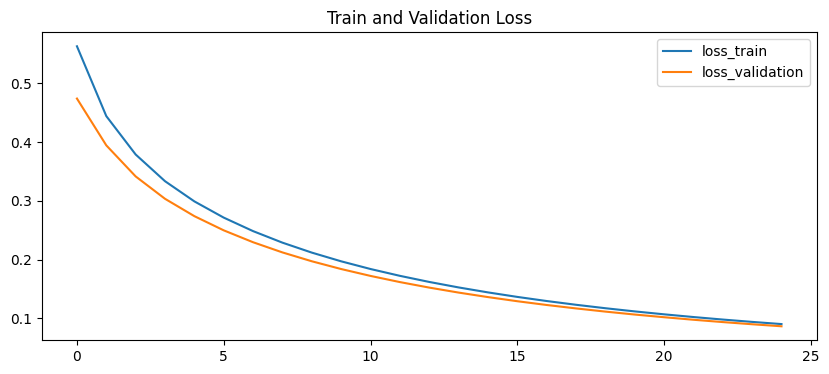

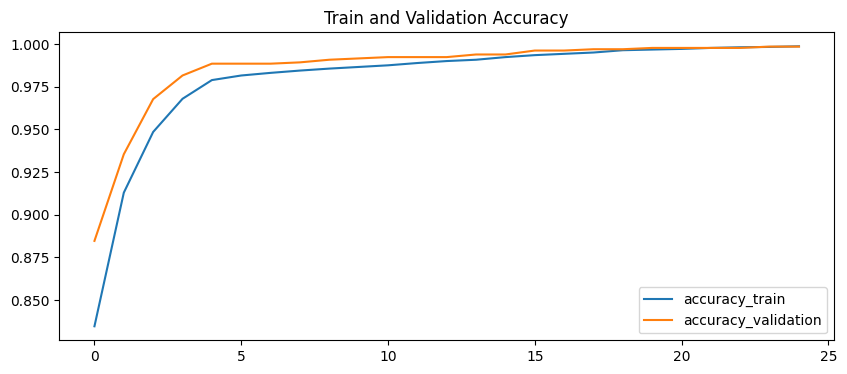

In [25]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 9: This model has a single hidden layer that is a dense layer. The number of neurons in the hidden layer is 1. A batch normalization layer is added after the hidden layer.  The optimizer is SGD.

In [26]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(1)(layer_input)

# add batch normalization layer
layer_batch_normal_1 = tf.keras.layers.BatchNormalization()(layer_dense_1)

# activation layer included as a separate layer
layer_activation_1 = tf.keras.layers.Activation('relu')(layer_batch_normal_1)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_activation_1)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8482 - loss: 0.5899 - val_accuracy: 0.9400 - val_loss: 0.5279
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9300 - loss: 0.5175 - val_accuracy: 0.9546 - val_loss: 0.4500
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9460 - loss: 0.4594 - val_accuracy: 0.9669 - val_loss: 0.3979
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9528 - loss: 0.4109 - val_accuracy: 0.9731 - val_loss: 0.3560
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9579 - loss: 0.3703 - val_accuracy: 0.9746 - val_loss: 0.3211
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.3359 - val_accuracy: 0.9762 - val_loss: 0.2915
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.3062 - val_accuracy: 0.9746 - val_loss: 0.2663
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9684 - loss: 0.2805 - val_accuracy: 0.

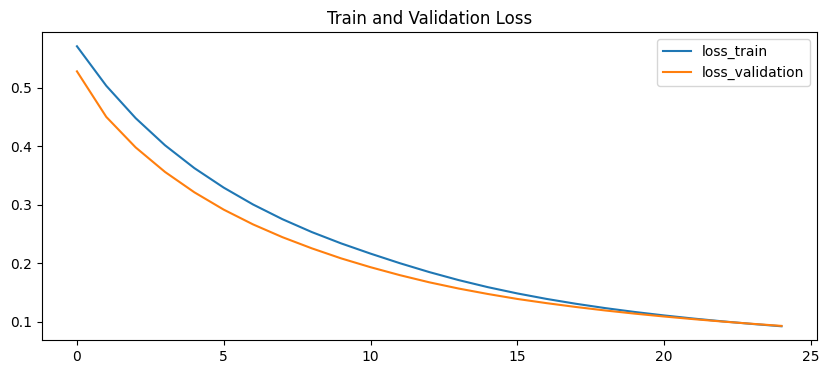

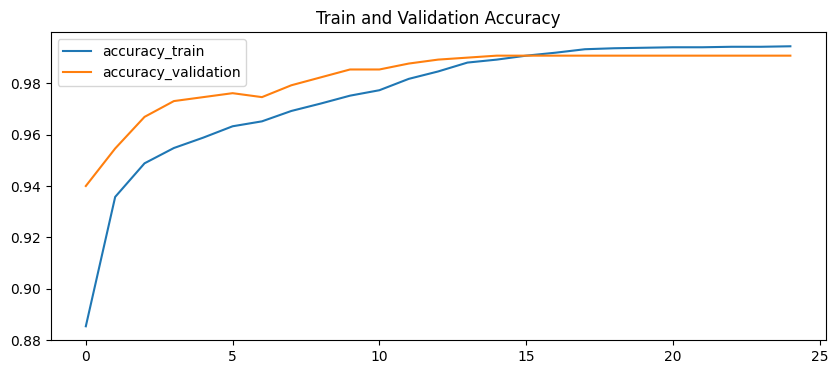

In [27]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 10: This model has a single hidden layer that is a dense layer. The number of neurons in the hidden layer is 1. A batch normalization layer is added after the hidden layer. The optimizer is adam.

In [28]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(1)(layer_input)

# add batch normalization layer
layer_batch_normal_1 = tf.keras.layers.BatchNormalization()(layer_dense_1)

# activation layer included as a separate layer
layer_activation_1 = tf.keras.layers.Activation('relu')(layer_batch_normal_1)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_activation_1)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8699 - loss: 0.5736 - val_accuracy: 0.9700 - val_loss: 0.4809
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9563 - loss: 0.4658 - val_accuracy: 0.9762 - val_loss: 0.3880
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9735 - loss: 0.3870 - val_accuracy: 0.9823 - val_loss: 0.3236
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.3249 - val_accuracy: 0.9823 - val_loss: 0.2756
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.2782 - val_accuracy: 0.9823 - val_loss: 0.2398
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9812 - loss: 0.2425 - val_accuracy: 0.9823 - val_loss: 0.2118
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.2143 - val_accuracy: 0.9823 - val_loss: 0.1888
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.1917 - val_accuracy: 0.

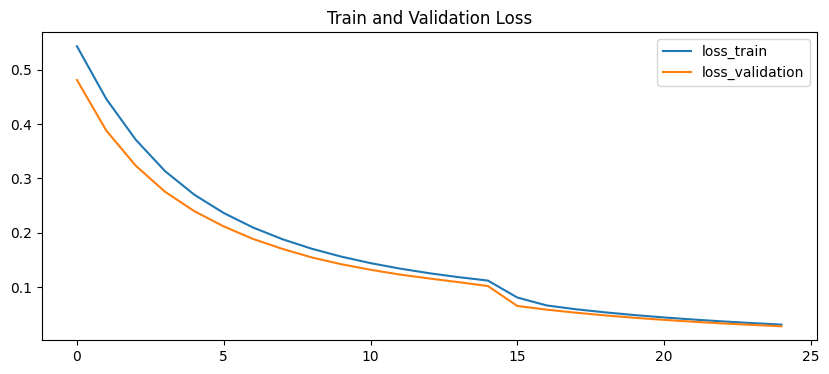

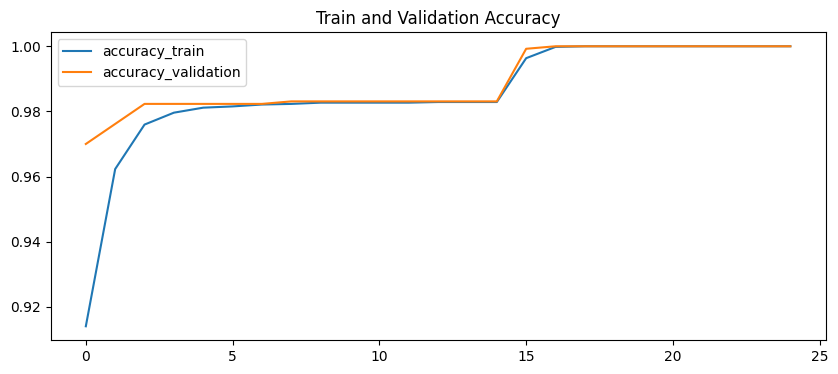

In [29]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 11: This model has two hidden layers that are both dense layers. The number of neurons in each hidden layer is 1. The optimizer is SGD.

In [30]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(1, activation = 'relu')(layer_input)

# add dense layer
layer_dense_2 = tf.keras.layers.Dense(1, activation = 'relu')(layer_dense_1)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_2)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3313 - loss: 0.7003 - val_accuracy: 0.4315 - val_loss: 0.6965
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4470 - loss: 0.6957 - val_accuracy: 0.4677 - val_loss: 0.6949
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4718 - loss: 0.6945 - val_accuracy: 0.4869 - val_loss: 0.6940
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4836 - loss: 0.6939 - val_accuracy: 0.4954 - val_loss: 0.6935
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4948 - loss: 0.6935 - val_accuracy: 0.5077 - val_loss: 0.6932
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5038 - loss: 0.6933 - val_accuracy: 0.5131 - val_loss: 0.6929
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5098 - loss: 0.6931 - val_accuracy: 0.5192 - val_loss: 0.6928
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5118 - loss: 0.6930 - val_accuracy: 0.

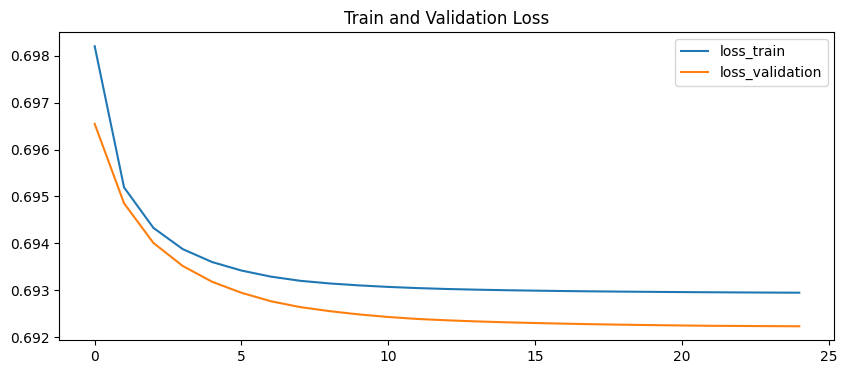

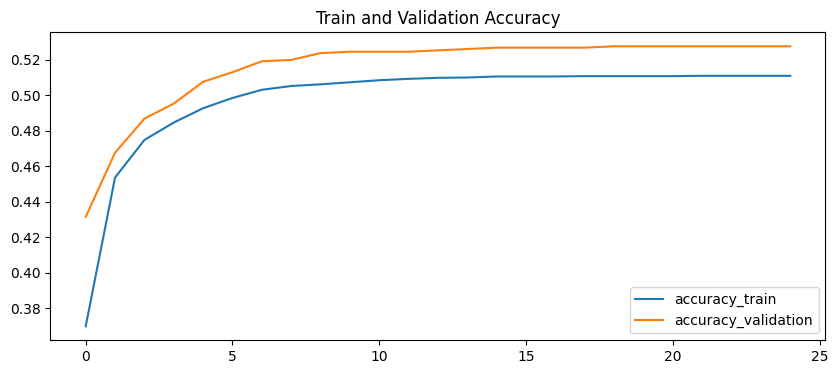

In [31]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 12: This model has two hidden layers that are both dense layers. The number of neurons in each hidden layer is 1. The optimizer is adam.

In [32]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(1, activation = 'relu')(layer_input)

# add dense layer
layer_dense_2 = tf.keras.layers.Dense(1, activation = 'relu')(layer_dense_1)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_2)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4307 - loss: 0.6965 - val_accuracy: 0.5246 - val_loss: 0.6927
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5171 - loss: 0.6929 - val_accuracy: 0.5277 - val_loss: 0.6925
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5175 - loss: 0.6928 - val_accuracy: 0.5277 - val_loss: 0.6924
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5175 - loss: 0.6927 - val_accuracy: 0.5277 - val_loss: 0.6923
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5175 - loss: 0.6927 - val_accuracy: 0.5277 - val_loss: 0.6923
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5175 - loss: 0.6927 - val_accuracy: 0.5277 - val_loss: 0.6923
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5175 - loss: 0.6927 - val_accuracy: 0.5277 - val_loss: 0.6922
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5192 - loss: 0.6926 - val_accuracy: 0.

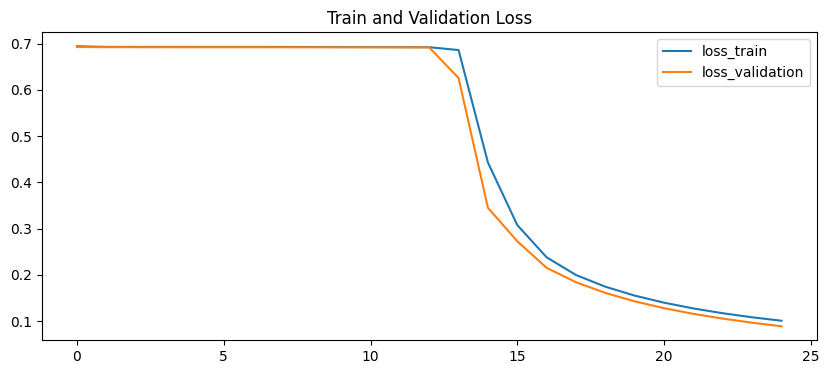

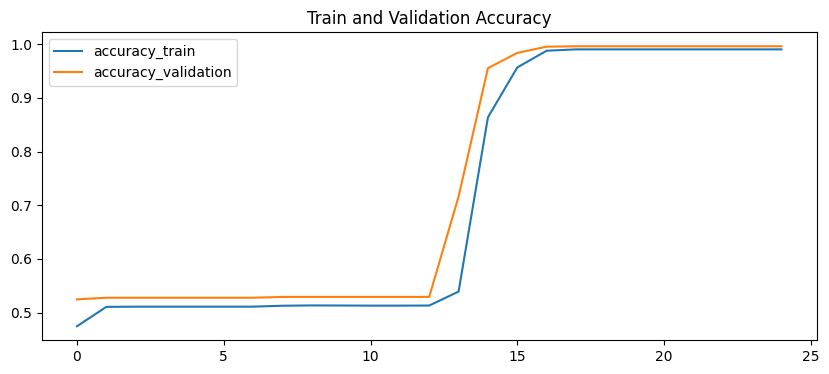

In [33]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 13: This model has a single hidden layer that is a dense layer. The number of neurons in the hidden layer is 5. The optimizer is SGD. 

In [34]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(5, activation = 'relu')(layer_input)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_1)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6483 - loss: 0.6752 - val_accuracy: 0.8508 - val_loss: 0.6026
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.5746 - val_accuracy: 0.9000 - val_loss: 0.4847
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8981 - loss: 0.4528 - val_accuracy: 0.9054 - val_loss: 0.3583
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9096 - loss: 0.3336 - val_accuracy: 0.9192 - val_loss: 0.2642
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9200 - loss: 0.2516 - val_accuracy: 0.9438 - val_loss: 0.2056
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9357 - loss: 0.2013 - val_accuracy: 0.9669 - val_loss: 0.1680
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9512 - loss: 0.1688 - val_accuracy: 0.9762 - val_loss: 0.1423
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9624 - loss: 0.1465 - val_accuracy: 0.

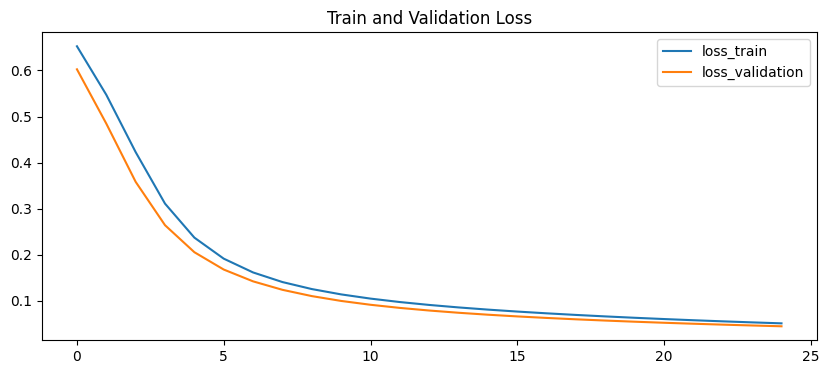

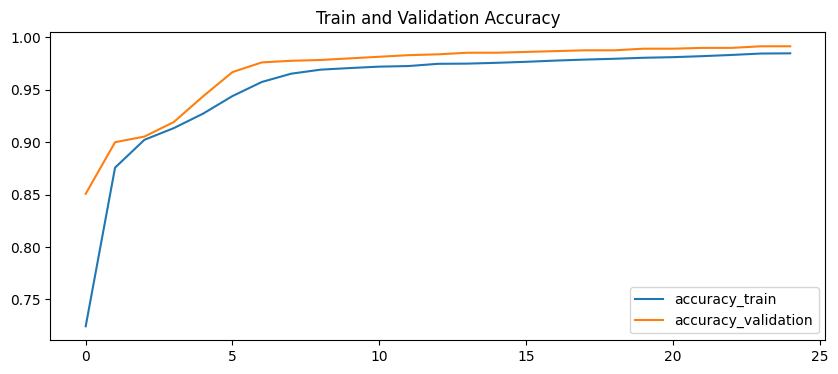

In [35]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 14: This model has a single hidden layer that is a dense layer. The number of neurons in the hidden layer is 5. The optimizer is adam. 

In [36]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(5, activation = 'relu')(layer_input)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_1)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7709 - loss: 0.6068 - val_accuracy: 0.9262 - val_loss: 0.3022
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.2490 - val_accuracy: 0.9762 - val_loss: 0.1422
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9702 - loss: 0.1296 - val_accuracy: 0.9877 - val_loss: 0.0841
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.0818 - val_accuracy: 0.9915 - val_loss: 0.0562
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0566 - val_accuracy: 0.9946 - val_loss: 0.0392
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9930 - loss: 0.0400 - val_accuracy: 0.9969 - val_loss: 0.0275
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0289 - val_accuracy: 0.9985 - val_loss: 0.0205
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.0218 - val_accuracy: 0.

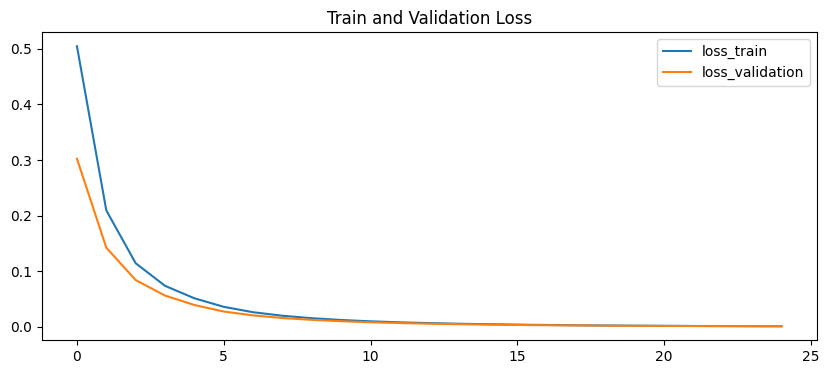

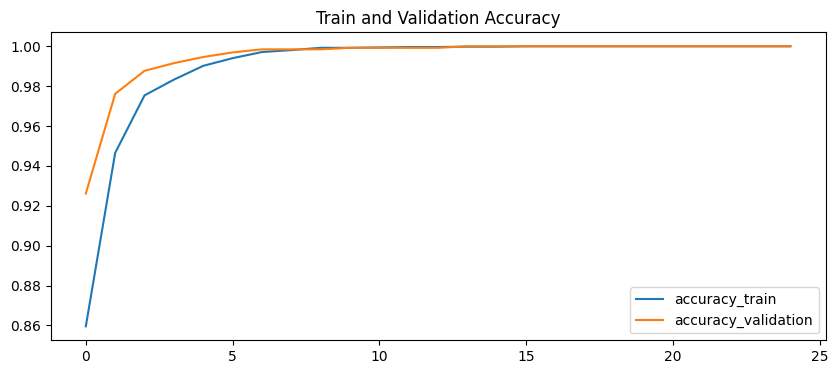

In [37]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 15: This model has two hidden layers that are both dense layers. The number of neurons in each hidden layer is 5. The optimizer is SGD.

In [38]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(5, activation = 'relu')(layer_input)

# add dense layer
layer_dense_2 = tf.keras.layers.Dense(5, activation = 'relu')(layer_dense_1)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_2)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5502 - loss: 0.6956 - val_accuracy: 0.6500 - val_loss: 0.6898
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6576 - loss: 0.6879 - val_accuracy: 0.7300 - val_loss: 0.6835
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7341 - loss: 0.6809 - val_accuracy: 0.7685 - val_loss: 0.6732
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7680 - loss: 0.6681 - val_accuracy: 0.7938 - val_loss: 0.6468
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8084 - loss: 0.6297 - val_accuracy: 0.8538 - val_loss: 0.5689
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.5417 - val_accuracy: 0.8962 - val_loss: 0.4697
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8953 - loss: 0.4464 - val_accuracy: 0.9269 - val_loss: 0.3916
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9224 - loss: 0.3756 - val_accuracy: 0.

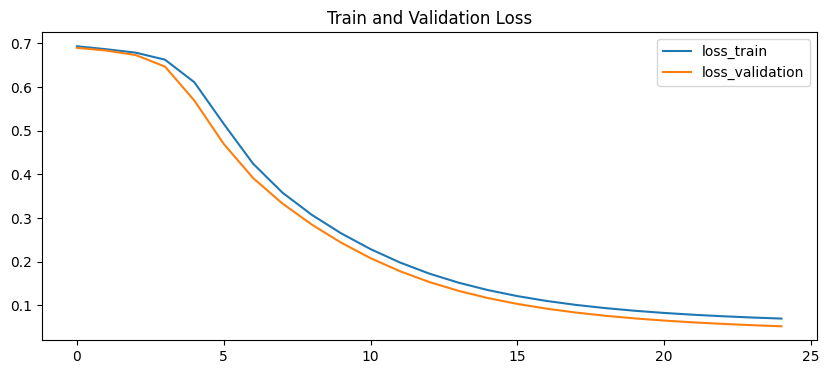

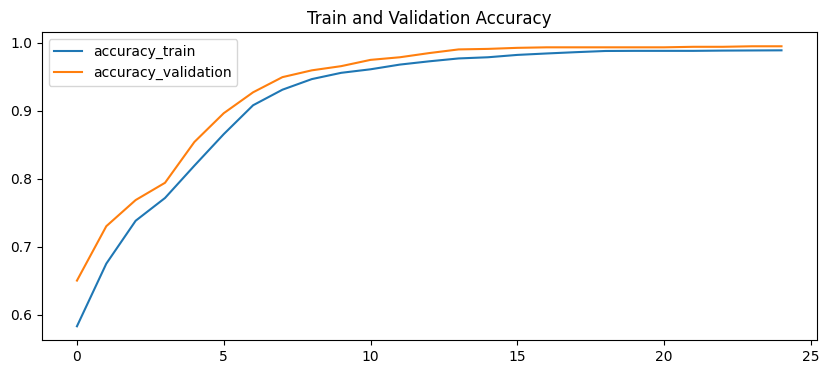

In [39]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 16: This model has two hidden layers that are both dense layers. The number of neurons in each hidden layer is 5. The optimizer is adam.

In [9]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(5, activation = 'relu')(layer_input)

# add dense layer
layer_dense_2 = tf.keras.layers.Dense(5, activation = 'relu')(layer_dense_1)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_2)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7254 - loss: 0.6610 - val_accuracy: 0.9292 - val_loss: 0.3248
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9528 - loss: 0.2302 - val_accuracy: 0.9869 - val_loss: 0.0812
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9851 - loss: 0.0682 - val_accuracy: 0.9946 - val_loss: 0.0366
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9967 - loss: 0.0320 - val_accuracy: 0.9985 - val_loss: 0.0204
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.0177 - val_accuracy: 0.9985 - val_loss: 0.0128
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0108 - val_accuracy: 0.9985 - val_loss: 0.0086
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0070 - val_accuracy: 0.9992 - val_loss: 0.0061
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0047 - val_accuracy: 0.

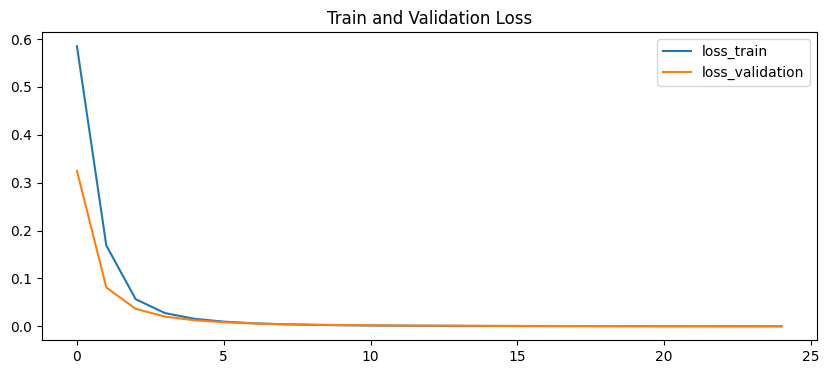

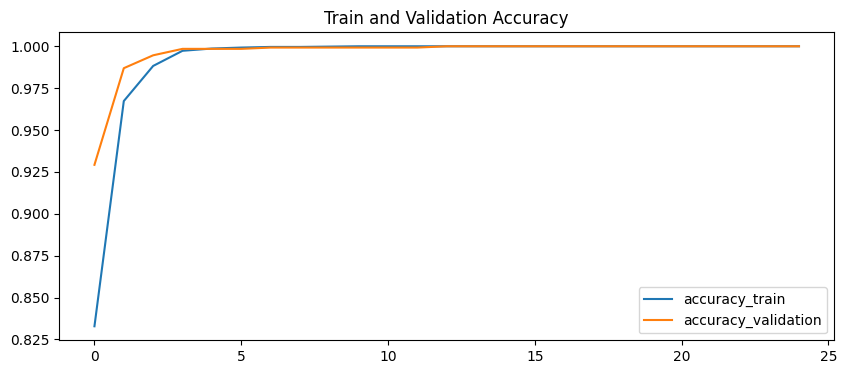

In [10]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 17: This model has the same architecture and hyperparameter values as model 16, but the model is run using a reduced number of predictor variables in the train set. The main reason in this case for removing some of the predictor variables is to simplify the model. In general, removing predictor variables can also potentially help a model generalize better by helping to prevent overfitting, but it is not the motivation behind making this change in this case.

## Specifically, the predictor variables "gill-attachment_f", "gill-attachment_a", "stalk-color-above-ring_o", and "stalk-color-below-ring_o" were removed from the data set. These predictor variables were chosen because they have correlation values that are particularly high (all are above 0.90 or below -0.90). Other predictor variables had correlation values greater than 0.90 or below -0.90, but I decided to only remove these four predictor variables because all of them are also highly correlated with the predictor variable "veil-color_w". I thought it would be interesting to see if removing these specific four predictor variables and leaving the predictor variable "veil-color_w" in the data set would still provide enough information for the neural network to achieve a high level of predictive power as shown through a high accuracy score.

In [9]:
# remove "gill-attachment_f", "gill-attachment_a", "stalk-color-above-ring_o", and "stalk-color-below-ring_o" from the data set
mushrooms_predictors_OHE_modified_df = mushrooms_predictors_OHE_df.drop(columns = ['gill-attachment_f', 'gill-attachment_a', 'stalk-color-above-ring_o', 'stalk-color-below-ring_o'], inplace = False) 

## The mushroom data is divided into a train set (80%) and a test set (20%).

In [10]:
mushrooms_predictors_train_df, mushrooms_predictors_test_df, mushrooms_response_train_df, mushrooms_response_test_df = train_test_split(mushrooms_predictors_OHE_modified_df, mushrooms_response_OHE_df, test_size = 0.2, random_state = 525)

In [11]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = mushrooms_predictors_train_df.iloc[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape = input_dimensions)

# add dense layer
layer_dense_1 = tf.keras.layers.Dense(5, activation = 'relu')(layer_input)

# add dense layer
layer_dense_2 = tf.keras.layers.Dense(5, activation = 'relu')(layer_dense_1)

# output layer
layer_output = tf.keras.layers.Dense(2, activation = 'sigmoid')(layer_dense_2)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy']
              )

model_output = model.fit(x = mushrooms_predictors_train_df, y = mushrooms_response_train_df, validation_split = 0.2, epochs = 25)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6887 - loss: 0.6811 - val_accuracy: 0.9331 - val_loss: 0.5160
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9418 - loss: 0.3778 - val_accuracy: 0.9885 - val_loss: 0.1141
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9798 - loss: 0.1015 - val_accuracy: 0.9923 - val_loss: 0.0478
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9877 - loss: 0.0468 - val_accuracy: 0.9985 - val_loss: 0.0270
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0258 - val_accuracy: 0.9985 - val_loss: 0.0177
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 0.0164 - val_accuracy: 0.9985 - val_loss: 0.0128
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 0.0113 - val_accuracy: 0.9985 - val_loss: 0.0094
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 0.0080 - val_accuracy: 0.

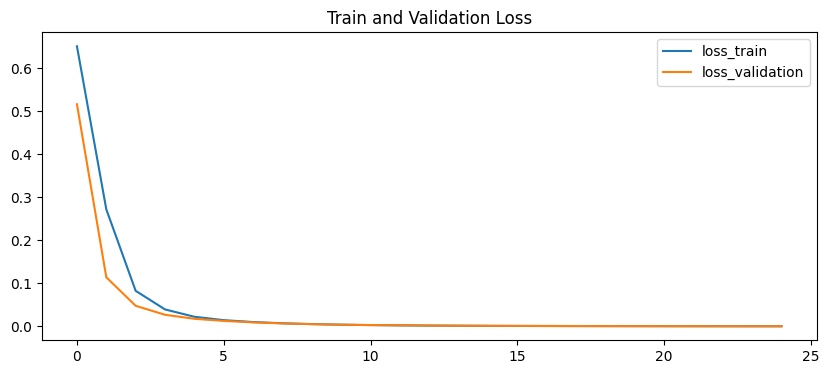

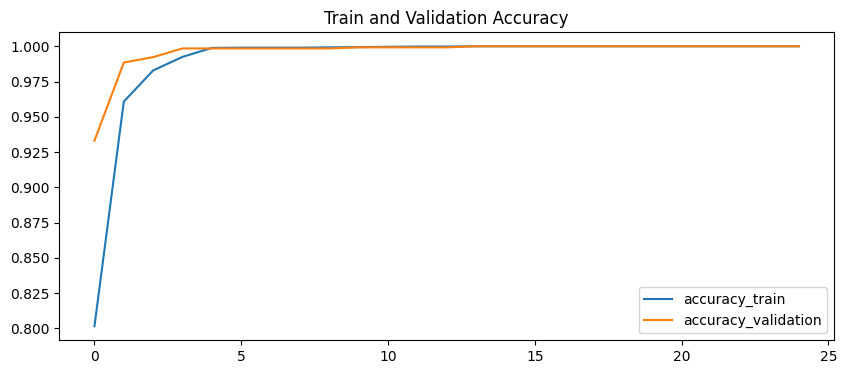

In [12]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

# Results and Analysis:

## A summary table of the 17 different models that were run is shown below.

In [27]:
# organize data for table
data_for_table = [["1", "1", "1", "None", "None", 'SGD', 'None', '24', '0.9877'], ["2", "1", "1", 'None', "None", "adam", 'None', '20', '0.9992'], ["3", "1", "1", "None", 'l2 = 0.0001', "SGD", 'None', '24', '0.9877'], ["4", "1", "1", 'None', 'l2 = 0.001', "SGD", 'None', "23", '0.9877'], ["5", "1", "1", 'None', "l2 = 0.01", "SGD", 'None', '22', '0.9900'], ["6", "1", "1", "None", 'l2 = 0.0001', "adam", 'None', '21', '0.9992'], ["7", "1", "1", "None", 'l2 = 0.001', "adam", 'None', '11', '0.9985'], ["8", "1", "1", "None", 'l2 = 0.01', "adam", 'None', '24', '0.9985'], ["9", "1", "1", "1", "None", "SGD", 'None', '15', '0.9908'], ["10", "1", "1", "1", "None", "adam", 'None', '17', '1.0000'], ["11", "2", "1", "None", "None", 'SGD', 'None', '19', '0.5277'], ["12", "2", "1", "None", "None", 'adam', 'None', '18', '0.9962'], ["13", "1", "5", "None", "None", 'SGD', 'None', '24', '0.9915'], ["14", "1", "5", "None", "None", 'adam', 'None', '14', '1.0000'], ["15", "2", "5", "None", "None", 'SGD', 'None', '24', '0.9946'], ["16", "2", "5", "None", "None", 'adam', 'None', '13', '1.0000'], ["17", "2", "5", "None", "None", 'adam', 'reduced variables','14', '1.0000']]

# create data table
table_summary_models = pd.DataFrame(data_for_table, columns = ["Model #", "# Hidden Layers", "# Neurons Per Layer", "Batch Normalization Layer(s)", "Kernel Regularizer", "Optimizer", "Additional Info","Epoch # Highest Validation Accuracy", "Validation Accuracy"])

# display table
pd.set_option('display.max_colwidth', None)

table_summary_models

,Model #,# Hidden Layers,# Neurons Per Layer,Batch Normalization Layer(s),Kernel Regularizer,Optimizer,Additional Info,Epoch # Highest Validation Accuracy,Validation Accuracy
0,1,1,1,None,None,SGD,None,24,0.9877
1,2,1,1,None,None,adam,None,20,0.9992
2,3,1,1,None,l2 = 0.0001,SGD,None,24,0.9877
3,4,1,1,None,l2 = 0.001,SGD,None,23,0.9877
4,5,1,1,None,l2 = 0.01,SGD,None,22,0.9900
5,6,1,1,None,l2 = 0.0001,adam,None,21,0.9992
6,7,1,1,None,l2 = 0.001,adam,None,11,0.9985
7,8,1,1,None,l2 = 0.01,adam,None,24,0.9985
8,9,1,1,1,None,SGD,None,15,0.9908
9,10,1,1,1,None,adam,None,17,1.0000


## When looking over the summary table above, most models achieve a very high validation accuracy in later epochs. Models 10, 14, 16, and 17 gave the highest validation accuracy of 1.0000. All of the models that had a validation accuracy of 1.0000 used adam as the optimizer.

## Model 10 is very similar to model 2, but model 10 includes the addition of a batch normalization layer. Such a modification to the architecture of the neural network caused the validation accuracy to increase from 0.9992 in model 2 to 1.0000 in model 10.

## Model 14 is very similar to model 2, but model 14 has 5 neurons in the hidden layer where model 2 has 1 neuron in the hidden layer. This change of one of the neural network's hyperparameters resulted in the validation accuracy increasing from 0.9992 in model 2 to 1.0000 in model 14.

## Model 16 is similar to model 14, but model 16 has a total of 2 hidden layers with 5 neurons in each layer where model 14 has 1 hidden layer with 5 neurons. Such a modification of the architecture of the neural network led to the validation accuracy reaching 1.0000 at an earlier epoch number of 13 relative to the epoch number of 14 in model 14.

## When looking at how the addition of kernel regularization affected the performance of the models that used SGD as the optimizer, values of 0.0001 and 0.001 for l2 kernel regularization in model 3 and model 4 respectively did not cause the validation accuracy to increase compared to model 1 which had similar neural network architecture and hyperparameters as model 3 and model 4 but did not include any kernel regularization. In model 5, where the l2 kernel regularization is 0.01, the validation accuracy increased to 0.9900 relative to model 1 which had a validation accuracy of 0.9877.

## When looking at how the addition of kernel regularization affected the performance of the models that used adam as the optimizer, a value of 0.0001 for l2 kernel regularization in model 6 did not cause the validation accuracy to change compared to the model 2 which had similar neural network architecture and hyperparameters as model 6 but did not include any kernel regularization. Interestingly, in model 7 and model 8 where the l2 kernel regularization is 0.001 and 0.01 respectively, the validation accuracy actually decreased to 0.9985 relative to model 2 which had a validation accuracy of 0.9992.

## Evaluating the effect of adding a second hidden layer comprised of a single neuron to the neural architecture, as is the case for model 11 and model 12, the validation accuracy goes down. This was somewhat surprising because I believed that an additional hidden layer would learn the complexities of the train data better than a single layer would and result in a higher validation accuracy.  For model 11, the validation accuracy is 0.5277, which is substantially lower than the validation accuracy of model 1 of 0.9877. For model 12, the validation accuracy is 0.9962, which is slightly lower than the validation accuracy of model 2 of 0.9992.

## When the number of hidden layers in the neural network is maintained at 1 but the number of neurons is increased to 5, as is the case for model 13 and model 14, the validation accuracy increases. For model 13, the validation accuracy is 0.9915, which is higher than the validation accuracy of model 1 of 0.9877. For model 14, the validation accuracy is 1.0000, which is higher than the validation accuracy of model 2 of 0.9992.

## When a second hidden layer of 5 neurons is added to the neural network for a total of 2 hidden layers each comprised of 5 neurons, the validation accuracy either increases or reaches a value of 1.0000 faster. For model 15, the validation accuracy is 0.9946, which is higher than the validation accuracy of model 13 of 0.9915. For model 16, the validation accuracy of 1.0000 is the same value for the validation accuracy of model 14, but model 16 reaches that value faster at epoch 13 versus epoch 14 for model 14. 

## Model 17 is unique because it is the only model run with 4 one hot encoded predictor variables removed from the data set. The architecture and hyperparameters of model 17 are identical to those of model 16. Model 17 achieves a validation accuracy of 1.0000 at epoch 14, while model 16 achieves a validation accuracy of 1.0000 at epoch 13. Even though model 17 takes slightly longer to achieve a validation accuracy of 1.0000, the model is also simplified because it is being run with four fewer one hot encoded predictor variables.

## Below I calculate the accuracy for model 16 and for model 17 using the test data.

In [11]:
# generate predicted labels from model 16 using predictor variables from test data, ***code called directly after model 16 run***
# ***variable "model" is from model 16***
labels_predicted = model.predict(mushrooms_predictors_test_df)
    
# convert predicted labels that are in the form of probabilities to binary form of 1 and 0 as a pandas dataframe
labels_predicted_df = pd.DataFrame(labels_predicted)
labels_predicted_df_greater = (labels_predicted_df >= 0.5).copy()
labels_predicted_df_1 = labels_predicted_df_greater.replace(True, 1).copy()
labels_predicted_df_1_0 = labels_predicted_df_1.replace(False, 0).copy()

# calculate accuracy for model 16
accuracy = accuracy_score(mushrooms_response_test_df, labels_predicted_df_1_0)

print("The accuracy for model 16 is: " + str(accuracy))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The accuracy for model 16 is: 1.0


<ipython-input-11-0cacf8664342>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels_predicted_df_1_0 = labels_predicted_df_1.replace(False, 0).copy()


## The accuracy for model 16 based on the test data is 1.0.

In [13]:
# generate predicted labels from model 17 using predictor variables from test data, ***code called directly after model 17 run***
# ***variable "model" is from model 17***
labels_predicted = model.predict(mushrooms_predictors_test_df)
    
# convert predicted labels that are in the form of probabilities to binary form of 1 and 0 as a pandas dataframe
labels_predicted_df = pd.DataFrame(labels_predicted)
labels_predicted_df_greater = (labels_predicted_df >= 0.5).copy()
labels_predicted_df_1 = labels_predicted_df_greater.replace(True, 1).copy()
labels_predicted_df_1_0 = labels_predicted_df_1.replace(False, 0).copy()

# calculate accuracy for model 17
accuracy = accuracy_score(mushrooms_response_test_df, labels_predicted_df_1_0)

print("The accuracy for model 17 is: " + str(accuracy))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The accuracy for model 17 is: 1.0


<ipython-input-13-aff48ba32b44>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels_predicted_df_1_0 = labels_predicted_df_1.replace(False, 0).copy()


## The accuracy for model 17 based on the test data is 1.0.

## Since the accuracy calculated using the test data for both model 16 and model 17 is 1.0, I would say the overall best model is model 17. I choose model 17 as the best model overall because even though it takes the model one additional epoch to reach the validation accuracy of 1.0000, the model is also more simplified contrasted to model 16 because four one hot encoded predictor variables are removed from the data it is running on. In general, when there are highly correlated predictor variables, controlling for them in some manner is considered best practice. In this case, I was able to remove four of the one hot encoded predictor variables and model 17 was still able to achieve a validation accuracy of 1.0000 and an accuracy of 1.0 based on the test data.

# Conclusion and Discussion:

## With the exception of model 11, all of the models achieve a very high validation accuracy. When looking over all of the models, it is also clear that the models composed of two hidden layers with each layer composed of 5 neurons perform the best overall, as is seen for model 16 and model 17. As stated above, I choose model 17 to be the best performing model overall.  This is because it achieves a validation accuracy of 1.0000, an accuracy based on the test data of 1.0, and the data set it is run on has four predictor variables removed from it so the model is more simplified than model 16. 

## It is important to note that since most of the models have validation accuracies that are very close to one another, attributing slight increases in validation accuracy to changes in model architecture and to tuning certain hyperparameters needs to be done with caution. Since the data used to calculate the validation accuracy is a subset of data that is chosen randomly, it is possible that a different subset of data might lead to models with slightly different validation accuracies.

## In terms of improvements that could be made to the models, trying to remove additional predictor variables to further simplify the model is definitely an avenue worth exploring. While I looked at predictor variables with correlation values greater than 0.85 or less than -0.85, it could be beneficial to look at predictor variables with correlation values in a different range, say greater than 0.70 or less than -0.70. It is very possible that a greater number of predictor variables could be removed from the data set and that a model could be run on the reduced data set and still provide a very high accuracy score.

## If new models are run using a reduced number of predictor variables, it may become necessary to try different architectures and to further tune hyperparameters to achieve a high level of accuracy. For instance, additional hidden layers could be added to create deeper neural networks.  Also, the number of neurons in each hidden layer could also be increased. Batch size is a hyperparameter that I did not try tuning and it could be beneficial to try this in future models. For the hyperparameters that I did try tuning in my 17 models, there are definitely a wider range of values that can be tried for each hyperparameter as well as many more additional combinations of hyperparameter values that can be tried. 



# References:

## Below are the references I have used throughout the course. The first four references are the most recent references I consulted specifically for the final project.

## Ray, Sunil. (2018, August 20) "Building your First Neural Network on a Structured Dataset (using Keras)." *Medium*. https://medium.com/analytics-vidhya/build-your-first-neural-network-model-on-a-structured-dataset-using-keras-d9e7de5c6724.

## Dutta, Sanjay. (2024, July 15) "Understanding Batch Normalization:." *Medium*. https://medium.com/@sanjay_dutta/understanding-the-batch-normalization-ffac49532367#:~:text=To%20add%20batch%20normalization%20to,each%20activation%20function%20are%20normalized.

## Whoop, Pascal. (2019, January 15) "An Overview of Categorical Input Handling for Neural Networks." *Medium, TDS Archive*. https://medium.com/data-science/an-overview-of-categorical-input-handling-for-neural-networks-c172ba552dee. 

## Brownlee, Jason. (2020, August 27) "3 Ways to Encode Categorical Variables for Deep Learning." *Machine Learning Mastery*. https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/#:~:text=Machine%20learning%20and%20deep%20learning,fit%20and%20evaluate%20a%20model.

## Li, Susan. (2019, March 18) “A Complete Exploratory Data Anal- ysis and Visualization for Text Data: How to combine visualization and NLP in order to generate insights in an intuitive way.” *Medium*. https://towardsdatascience.com/a-complete-exploratory-data- analysis-and-visualization-for-text-data-29fb1b96fb6a.

## Venkatappa, Bhuvana. (2024, June 12) "Text Classification with Neural Networks Using Keras: A Step-by-Step Guide." *Medium*. https://medium.com/@bhuvanav/text-classification-with-neural-networks-using-keras-a-step-by-step-guide-87ee7f1b36a1.

## Nasher, Khulood. (2021, February 27) “Non-negative Matrix Factor- ization.” *Medium*. https://khuloodnasher.medium.com/non-negative- matrix-factorization-6a51eae6bce5.

## Daly, Quin. (2023, July 12) “Step-by-Step NMF Example in Python.” *Medium*. https://medium.com/@quindaly/step-by-step-nmf-example-in- python-9974e38dc9f9.

## Geetha M, Sri. (2021, June 5) "Building a Basic Binary Text Classifier using Keras." *Medium*. https://medium.com/nerd-for-tech/building-a-basic-binary-text-classifier-using-keras-4972a7c36616.

## No author. (2023, October 9) "Stacked RNNs in NLP." *Geeks for Geeks*. https://www.geeksforgeeks.org/stacked-rnns-in-nlp/.

## Mohsen Nabil. "Unveiling the Diversity: A Comprehensive Guide to Types of CNN Architectures." *Medium*. October 17, 2023. https://medium.com/@navarai/unveiling-the-diversity-a-comprehensive-guide-to-types-of-cnn-architectures-9d70da0b4521.

## Victor Zhou. "Keras for Beginners: Implementing a Convolutional Neural Network, A beginner-friendly guide on using Keras to implement a simple Convolutional Neural Network (CNN) in Python." *victorzhou.com blog*. August 8, 2019. Updated November 10, 2020. https://victorzhou.com/blog/keras-cnn-tutorial/.

## Samhita Alla. "Introduction to Keras, Part One: Data Loading." *Medium*. December 11, 2020. https://medium.com/towards-data-science/introduction-to-keras-part-one-data-loading-43b9c015e27c#:~:text=The%20data%20has%20to%20be,Dataset%20objects%2C%20and%20Python%20generators.

## Kartik Menon. "Ultimate Guide To Building Powerful Keras Image Classification Models." *simplilearn*. September 17, 2024. https://simplilearn.com/tutorials/deep-learning-tutorial/guide-to-building-powerful-keras-image-classification-models

## Golnaz Hosseini. "Step-by-Step Tutorial: Image Classification with Keras." *Medium*. May 2, 2023. https://medium.com/@golnaz.hosseini/step-by-step-tutorial-image-classification-with-keras-7dc423f79a6b.

## Adrian Rosebrock. "Keras Conv2D and Convolutional Layers." *PyImageSearch*. December 31, 2018. https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/.

## Adrian Rosebrock. "Convolutional Neural Networks (CNNs) and Layer Types." *PyImageSearch*. May 14, 2021. https://pyimagesearch.com/2021/05/14/convolutional-neural-networks-cnns-and-layer-types/.

## Abhishek Jain. "Deep Learning Architecture 7 : DenseNet." *Medium*. Dec 16, 2024. https://medium.com/@abhishekjainindore24/deep-learning-architecture-7-densenet-feee44d57f89#:~:text=DenseNet%20architecture%20is%20based%20on,of%20all%20the%20previous%20blocks.

## Deep, Akash. "Understanding NLP Keras Tokenizer Class Arguments with example." *Medium*. Aug 22, 2020. https://medium.com/analytics-vidhya/understanding-nlp-keras-tokenizer-class-arguments-with-example-551c100f0cbd.

## Author Unknown. "Image Generation using Generative Adversarial Networks (GANs) using TensorFlow". *Geeks for Geeks*. March 4, 2025. https://www.geeksforgeeks.org/image-generation-using-generative-adversarial-networks-gans/.

## Rosebrock, Adrian. "GANs with Keras and TensorFlow". *PyImageSearch*. November 16, 2020. https://pyimagesearch.com/2020/11/16/gans-with-keras-and-tensorflow/.